![](https://images.unsplash.com/photo-1579706966698-cf96a97235ee?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1740&q=80)

# Credit Default Payment Prediction Algorithm with Machine Learning

## Executive Summary

> This project aims to build a state-of-the-art credit scoring and default prediction system for financial service providers with a stack of machine learning algorithms. Due to data source limits, the project is to conduct through the most recent machine learning techniques, starting from logistic regression, decision tree, random forest and gradient boosting machine. The XGBoost model gave the best model performance after training, with an accuracy of **93.89%** and scored **top 21%** on the Kaggle leaderboard.




# <a name="table"></a>Table of Contents

#### [I.Introduction](#intro)




*   [1.1 Machine Learning Modelling Process Overview](#1.1)
*   [1.2 Data Preparation](#1.2)
*   [1.3 Helper Function](#1.3)







#### [II.Machine Learning Modelling](#mlm)

*   [2.1 Model Selection](#2.1)
*   [2.2 Logistic Regression Model](#2.2)
*   [2.3 Decision Tree](#2.3)
*   [2.4 Random Forest](#2.4)
*   [2.5 Gradient Boosting Machines with XGBoost](#2.5)



#### [III.Hyperparameter Tuning](#hptn)

*   [3.1 Introduction to Hyperparameters](#3.1)
*   [3.2 Manually Tuning Hyperparameters](#3.2)
*   [3.3 Automating Tuning Hyperparameters](#3.3)
*   [3.4 Section Summary](#3.4)

#### [IV. Submitting to Kaggle](#sbk)

*   [4.1 Public Leaderboard](#4.1)
*   [4.2 Private Leaderboard](#4.2)
*   [4.3 Submit to Kaggle](#4.3)



#### [V. Conclusion](#con)

*   [5.1 The Purpose](#5.1)
*   [5.2 The Aim](#5.2)
*   [5.3 The Process](#5.3)
*   [5.4 The Models](#5.4)
*   [5.5 The Results](#5.5)
*   [5.6 The limitations](#5.6)
*   [5.7 Next Steps](#5.7)

#### [VI. Acknowledgements](#ackn)

#### [Reference](#ref)


## <a name="intro"></a>Ⅰ. Introduction

Since the financial crisis, organizations have realized the significance of risk management with the latest technology. To date, machine learning algorithms have been applied both in financial research and the financial service industry. Essentially, the implementation of credit scoring algorithms helps financial service providers estimate the creditworthiness of borrowers to reduce labour costs and constantly maintains sustainable development of the financial world.

Previously, machine learning researchers employed probit models such as linear regression, logistic regression, extreme gradient boosting(XGBoost), deep learning neural networks to estimate company rating with the input of financial behaviour (Provenzano et al., 2020). However, Addo et al. (2018) concluded that the tree-based models are more stable than ones based on multilayer artificial neural networks. 


In this project, the dataset is from Kaggle ([Link](https://www.kaggle.com/c/GiveMeSomeCredit)). The primary data is from individual credit card usage behaviour. We would focus on logistic regression, decision tree, random forest models and gradient boosting machine with data about individuals' credit behaviour in this project.

In [ ]:
# Install packages with the command of package manager
!pip install jovian --upgrade --quiet
!pip install opendatasets scikit-learn plotly --upgrade --quiet
!pip install pandas numpy matplotlib seaborn --quiet

     |████████████████████████████████| 68 kB 2.6 MB/s 
     |████████████████████████████████| 24.8 MB 67.3 MB/s 
     |████████████████████████████████| 26.5 MB 1.5 MB/s 



### 0 Downloading Dataset

We will use a wrapper to download the dataset at Kaggle using `opendatasets`. [Click here for more details](https://github.com/JovianML/opendatasets/blob/master/README.md#kaggle-credentials) But you will need to provide the account information on Kaggle to download data.

- First, you register an account on Kaggle if you haven't. 

- Second, you can get your API key on the account page. 

- Third, you come back to this notebook and fill in with the account information (Username&API key at Kaggle) to download **'Give Me Some Credit'** dataset when the input pop up

In [ ]:
# Import packages for version control and downloading data
import jovian
import opendatasets as od

# Download data from Kaggle
od.download("https://www.kaggle.com/c/GiveMeSomeCredit/discussion?sort=votes")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shenghongzhong
Your Kaggle Key: ··········


100%|██████████| 5.16M/5.16M [00:00<00:00, 24.6MB/s]


Extracting archive ./GiveMeSomeCredit/GiveMeSomeCredit.zip to ./GiveMeSomeCredit


In [ ]:
# Import Packages

import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

### <a name="1.1"></a>1.1 Machine Learning Modelling Process Overview


As shown in the picture below, we will go through 7 steps in a machine learning project. 

![](https://pbs.twimg.com/media/FGKtYUvXsAAdmYd?format=jpg&name=medium)

However, this project aims to learn different models at once, consisting of ** Model Selection**, **Model Training**, **Model Evaluation** for each model. For example,  We train a logistic regression model, explain evaluation metrics for the performance of the logistic regression model given the dataset. 

The entire idea of the project is to study models in detail. However, we would probably focus on the deadline and project requirements. We aim to get a model deployed as soon as possible in the commercial world. We would have internal experiments for each model and return to the best model, unlike this project that explains four models in great detail for the educational purpose.


fter getting the best model based on the evaluation, we would focus on tuning hyparameters for the best model rather than all models. In this project, it is XGBoost model as it performed the best.

The model deployment isn't involved in this project as it is out of the project scope.


### <a name="1.2"></a>1.2 Data Preparation

#### Outline

#### [1.2.1 Dataset Description](#dataset_description)



*   [a. The Dependent Variable](#1.2.1.a)
*   [b. Independent Variables](#1.2.1.b)






#### [1.2.2 Data Cleaning](#data_cleaning)

*   [a. Handling Missing Vlaues Strategies](#1.2.2.a)
*   [b. Explaining the Missing Values](#1.2.2.b)
*   [c. Handle the Missing Values](#1.2.2.c)
*   [d. Solutions](#1.2.2.d)
*   [e. Section Summary](#1.2.2.e)

#### [1.2.3 Exploratory Data Analysis](#eda)
#### [1.2.4 Data Processing](#data_process)


*   [A. Two ways of Scaling](#1.2.4.A)
*   [(1) Normalization](#1.2.4.1)
*   [(2) Standardization](#1.2.4.2)
*   [B. No Scaling in Project](#1.2.4.B)
*   [(1). Do Not Blindly Follow](#1.2.4.B.1)
*   [(2). The Reason: The Poor Performance](#1.2.4.B.2)








#### <a name="dataset_description"></a> 1.2.1 Dataset Description

The dataset is from Kaggle competition, 'Give Me Some Credit' for data science practitioners to train models for the competition. The dataset consists of 150K records about borrowers' credit card use behaviour and basic information. We can see this from the data description given on the website. ( You can also click the folder icon on your left sidebar. there is a folder named `GiveMeSomeCredit` under which you can see the file called 'Data Dictionary.xls'

![](https://i.imgur.com/tQSWU5p.png)



##### <a name="1.2.1.a"></a> a. The Dependent Variable

The dependent variable in our dataset is `SeriousDlqin2yrs`. i.e. the target of an individual experienced 90 days past due default or worse. It is a binary indicator with the value of 1 flagging a default event ( A person did not conduct debt payments over 90 days), 0 otherwise. 




##### <a name="1.2.1.b"></a>b. Independent Variables

On the other hand, input variables in the dataset are two types: basic information about borrowers' age, family, monthly income; credit cards use information such as credit lines, defaulting times within 60-89 days or 30-59 days but not worse (a person did not pay on the date but paid back with a specific time frame), a ratio of the sum of debt payments and living costs to monthly incomes.

In [66]:
# Import Data
df_train = pd.read_csv('/content/GiveMeSomeCredit/cs-training.csv')
# Drop the column
df_train.drop('Unnamed: 0',axis=1,inplace=True)
df_test = pd.read_csv('/content/GiveMeSomeCredit/cs-test.csv')
df_test.drop('Unnamed: 0',axis=1,inplace=True)

In [67]:
# See rows, columns
rows,cols = df_train.shape
print(f'We have {rows} rows and {cols} columns')

We have 150000 rows and 11 columns


In [ ]:
# Overview the dataset
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [68]:
# Check the statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

We can see `MonthlyIncome` and `NumberOfDependents` are missing values. We'll come back to them later


#### <a name="data_cleaning"></a> 1.2.2 Data Cleaning

[Back to Section 1.2 Data Preparation](#1.2)

In Python, `None` is used for showing missing values instead of `null` value in other programming language. Nevertheless, I used `null` as the prefix of variable to indicate missing values.

As shown in the chart below, `MonthlyIncome` has the most of missing values and the following is `NumberOfDependents`.


In [69]:
# Preview column names
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [70]:
# Assign null values

null_val_sums = df_train.isnull().sum()
null_val_df = pd.DataFrame({'# of null values':null_val_sums,"%":np.round(null_val_sums/len(df_train),2)})
null_val_df = null_val_df.sort_values('%',ascending=True)

# Plot missing values
fig = px.bar(null_val_df, x="# of null values",hover_data=['%'])
fig.update_layout(template='plotly_dark')
fig.show()

##### <a name="1.2.2.a"></a> a. Handling Missing Values Strategy - [Back to Top ⇧](#1.2)

By default, machine learning library cannot work with missing values. We would like to tidy up our dataset for the training later. We saw earlier that the attributes such as `MonthlyIncome` and `NumberOfDependents` have some missing values. In general, data scientists would have three options:

1. Drop those missing values
2. Drop the whole columns
3. Set the values to a certain value ( zero, the mean, the median, the most frequent value)

##### <a name="1.2.2.b"></a>b. Explain the missing values - [Back to Top ⇧](#1.2)

It is not surprising that the distribution for `MonthlyIncome` shows the extreme mean value. First, `MonthlyIncome` is numerical. Second, some who could make millions of dollars a month are outliers. This phenomenon is called Michael Jordan Fallacy Statistics, where outliers can give a chance that we misinterpret information.

We do not know why there are so many missing values in `MonthlyIncome`. It could be human mistakes. On the other hand, we could not replace missing values with an average due to the `Michael Jordan Fallacy` because some outliers can make millions of dollars a month.

##### <a name="1.2.2.c"></a> c. Handle the missing values 

It is generally suggested to handle 15%-30% of missing values as it might not affect the analysis result. However, the proportion of missing values in `MonthlyIncome` is 19%, where all of the missing values did not pay back the debts regarding `SeriousDlqin2yrs`.

Without any further information, I assumed except this is the mistake of data collection, my assumption for defaulting behaviour would be

>1. They did not have capabilities to pay back because of no income due to unemployment, etc
2. They might, unfortunately, pass away
3. They deliberately chose to default payment

[Back to Top ⇧](#1.2)


##### <a name="1.2.2.d"></a> d. Solutions

My decision is to conduct two solutions.

>Solution A
>: Replace all missing values with the median value, because the percentage of null values for `SeriousDlqin2yrs` of 1 is tiny, accounting for 1%

>Solution B: Replace them with separate values
>
>However, if we use a different denominator, the total number of values for `SeriousDlqin2yrs`, then the percentage is 16%.
>>1. Replace the missing values with the median value when `SeriousDlqin2yrs` is `0`. because they have the income to pay back if they can pay loans back 
2. When `SeriousDlqin2yrs` is `1`, I would drop them out of the dataset for now and save the missing value dataset as another subset for further investigation. I can imagine that the following action is to report to the relevant department to handle the situation. One hypothetical action may just employe people for chasing borrower's payment. There are 1,669 calls to make in this dataset.

>Solution C: Drop them. The percentage of missing values is 19% is acceptable.


[Back to Top ⇧](#1.2)

##### <a name="1.2.2.e"></a> e. Section Summary 

As of writing now, I concluded the solution A has the best outcome for training models. Because the training dataset does not contain sufficient data points for when `SeriousDlqin2yrs` is 1, which is called **Imbalanced Class**, it may cause a biased model.


[Back to Top ⇧](#1.2)

In [71]:
# Assign median, mode values
median_income = df_train['MonthlyIncome'].median()
mode_children = df_train['NumberOfDependents'].mode()

# Replace missing values correspondingly
df_train['MonthlyIncome'].fillna(median_income,inplace=True)
df_train['NumberOfDependents'].fillna(int(mode_children),inplace=True)

####  <a name="eda"></a> 1.2.3 Exploratory Data Analysis [- Notebook Link](https://jovian.ai/shenghongzhong/explorotary-data-analysis-for-credit-card-default-payment-algorithms)


[Back to Section 1.2 Data Preparation ⇧](#1.2)

Exploratory Data Analysis servers the purpose of performing initial investigations on data to discover patterns,spot anomalies,extract insights, test hypothesis using statistics and graphical representations.

The purpose of EDA is to help gain a better understanding of dataset and potential correlations between independent variables and the dependent variable. It is an essential step for any data analysts/data scientists to conduct. 

Since the project mainly focuses on machine learning knowledge, I have moved EDA to another notebook. You can find out more about EDA here: https://jovian.ai/shenghongzhong/explorotary-data-analysis-for-credit-card-default-payment-algorithms

In the notebook above, I explored each features thoroughly and it was great to see them in bar charts, box charts, histogram, etc.


#### <a name="data_process"></a> 1.2.4 Data Processing

[Back to Section 1.2 Data Preparation ⇧](#1.2)

Rarely, dataset would have columns which in the same range in machine learning projects, especially for the numeric data. However, machine learning algorithms map data of input variables to an output variable, we called it **modelling**. 

Scaler matters. Different ranges of values cause a problem with some algorithms. For example,  linear regression is the product of a weighted sum of input data, and k-nearest neighbors algorithm uses distance measures. Nevertheless, tree-based models use a different approach to conduct the logic of modelling due to the model infraustrure. 


A variables could have different units. For instance, we would say one of my friends is 6.8 feets tall, the distance between London and Beijing is 8,136 km. the hours to complete this project is 500+ hours. These are data that allows us to describe many objects to serve our purposes. On the other hand, these attributes have different scales for a subject.

Developing machine learning models for practical uses in real world is to think about future. data is exploding each day and we would have all kinds of different data with good or bad quailities. The best way is to regulate them into the same scale because of generalization errors and sensitivity to large input values. We aim to develop a stable machine learning model so we would change the data to the same scaler.

Another example to demonstrate the point here is when I come to the UK, I have to learn to use stones to describe people's weight. I never speak stone and had no ideas to understand meaning. In China, we use kg,g for weighting.



##### <a name="1.2.4.A"></a> Two Ways of Scaling

[Back to Top ⇧](#1.2)

In general, we have two main strategies to scale our data.

##### <a name="1.2.4.1"></a> (1) Normalization

Normalization scales each input variable separately to the range 0-1. It is floating-point values for precision.

Mathematically speaking,

$$y = \frac{(x – min)} {(max – min)}$$

where y is the product of when x is normalized 



##### <a name="1.2.4.2"></a>(2) Standardization

Standardization subtracts the mean from original values first and divides into the standard deviation to transform the range of each input variable. Standardization shifts the position of distribution meaning the distribution of any input variables has a mean of 0 and a standard deviation of 1.

$$y = \frac{(x – \mu)}{σ}$$

Where y is the product of when x is standardized

>Note
>If the data is not following a Gaussian distribution, then standardization might not be the correct scaling method for that dataset (in general). But in some cases standardization might give a good result even in a non Gaussian Dataset. Be wise to test anything you could


##### <a name="1.2.4.B"></a> B. No Scaling in Our Project

[Back to Top ⇧](#1.2)

In general, we won't need to scale tree-based models but normally we won't only train tree-based models. For example, we will train logistic model in our project. It's convenient to scale data together, even if it doesn't have any effect in tree based models.

However, it is necesssary to know the difference. This project did not use any scaling method because of the poor performance after using `.MinMaxScaler()` from Scikit-learn library. 

The use case of applying scaling method is logistic regression. However, I tested and the results are disappointing. See the picture below for the logistic regression before-after applying normalization scale.

![](https://i.imgur.com/9j0yQ2V.png)





##### <a name="1.2.4.B.1"></a>(1) Do Not Blindly Follow

Here is what I learned is do not blindly follow what it is beling told. I believe many people use the scale method without testing. 

In some cases you won't need scaling/encoding. But usually you do scaling in most projects. More importantly, we need to see data. In this project, it clearly shows scaling doesn't help which is tricky and many people may fall in the trap of habits , as I saw many notebooks on the competitions included the scaling step. Also, this project fosuces on tree based models that don't need scaling. 




##### <a name="1.2.4.B.2"></a>(2) The Reason for Poor Performance

Personally, I think the scaled data range desensitized the logistic regression when the default threshold of logistic regression is 0.5. 


In other words, the columns in the dataset have similar variance. i.e. data in the columns don't vary too much. The scaled columns aren't affecting much on the model training or have less correlation with the target column.

Hence, the classification performance is poorer, and the logistic model did not map the input variables well to the output variable.

It is possible to get similar results after scaling. Yet, in some cases, scaling may deliver poor results too. In data science, we have to make many assumptions and conduct experiments.



######1.2.4.c No Encoding method

We don't have categories data so the project did not include how to do encoding strategies.

In [89]:
## See brief statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,150000.0,6418.454920,12890.395542,0.0,3903.000000,5400.000000,7400.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


### <a name="1.3"></a>1.3 Helper function


Writing functions is a fantastic thing to do but is not always easy. However, the general principle is **"DRY** (Do Not Repeat Yourself) when writing function. 

It makes codes clean and readable. If something is not working or you want to modify some details, you can always change and implement the function block. We tend to complete projects in the short term, so writing functions are always neglected. Nevertheless, it is more efficient in the long run if we can encapsulate the processes over to functions to call them later in other projects as well. 

> learning other knowledge works the same. I would like to pack them and call them when I need them.
>
> It is similar to the concept of personal knowledge management called Evergreen notes https://notes.andymatuschak.org/Evergreen_notes
>
> Many people recommend project-based learning; I think it is also similar logic. You learn individual techniques and apply them to a project.



---



In this project, self-defined functions are as follows:

- `predict_and_plot`: we use them quite often in the section of evaluating our models. What it does is return a 4x4 matrix heatmap of the confusion matrix. We can see the performance of classification

- `make_auc`: we plot ROC-AUC to see the scores and the line. It is helpful to visualize the position of our model with the ideal model and the random model.

- `plot` and `make_cuve`: they are designed to be used together in the hyperparameter tuning section. My attempt is to plot the curve of changing a parameter when all other parameters are constant. Data visualization can help get intuition.

In [90]:

def predict_and_plot(inputs, targets, model,name='',normalize=None):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    if normalize == None:
      cf = confusion_matrix(targets, preds,normalize='all')
      plt.figure()
      sns.heatmap(cf, annot=True)
      plt.xlabel('Prediction')
      plt.ylabel('Target')
      plt.title('{} Confusion Matrix'.format(name));
    else:
      cf = confusion_matrix(targets, preds,normalize=normalize)
      plt.figure()
      sns.heatmap(cf, annot=True)
      plt.xlabel('Prediction')
      plt.ylabel('Target')
      plt.title('{} Confusion Matrix'.format(name));
    
    return preds


def make_auc(model,inputs,target):
    """
  Parameters: 
  -----------
  model : the target model
  inputs: validation inputs or X_test
  target: validation target or y_test

  Return
  -----------
  out: a plot of the Area Under the ROC curve (AUC)
  """

    probs = model.predict_proba(inputs)

    preds = probs[:,1]

    fpr,tpr,threshold = metrics.roc_curve(target,preds)

    roc_auc = metrics.auc(fpr,tpr)

    plt.title( "Receiver Operating Characteristic")
    plt.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    return plt.show()


def plot(param_list, variable_param, **params):
    accuracies = []
    for element in param_list:
      params[variable_param] = element
      model = XGBClassifier(n_jobs=4, random_state=42,**params)
      predictions = model.fit(train_inputs,train_target).predict(val_inputs)
      accuracies.append(accuracy_score(val_target,predictions))
    
    tem_df=pd.DataFrame(list(zip(param_list, accuracies)),columns=[variable_param,"accuracy"])
    fig = px.line(data_frame=tem_df,x=variable_param,y='accuracy', title="XGBoost Learning Curve")
    fig.show()


def make_curve(param_list,eta_rate=None,max_depth=None,n_estimators=None):
  """
  Model: XGBoostClassifier()
  """
  
  if eta_rate == None:
      plot(param_list, "learning_rate")
  elif max_depth == None:
      plot(param_list, "max_depth", learning_rate=eta_rate)
  elif n_estimators == None: 
      plot(param_list, "n_estimators", learning_rate=eta_rate, max_depth = max_depth)

## <a name="mlm"></a>Ⅱ. Machine Learning Modelling

[Back to Table of Contents ⏫](#table)

#### Section Outline

#### [2.1 Model Selection](#2.1)
#### [2.2 Logistic Regression Model](#2.2)


*   [2.2.1 Create Logistic Model](#2.2.1)
*   [2.2.2 Evaluate Result](#2.2.2)


> *   [a. Confusion Matrix](#2.2.2.a)


*   [2.2.3 Improve Model](#2.2.3)
> *   [a. Accuracy](#2.2.3_a)
> *   [b Precision](#2.2.3_b)
> *   [c Recall](#2.2.3_c)
> *   [d Receiver Operating Characteristic](#2.2.3_d)
> *   [e Area Under the ROC Curve](#2.2.3_e)

#### [2.3 Decision Tree](#2.3)


*   [2.3.1 Introduction](#2.3.1)
*   [2.3.2 Classification Process](#2.3.2)
*   [2.3.3 Decision Tree Metrics](#2.3.3)


> *   [2.3.3a Pruning](#2.3.3a)
> *   [2.3.3b Information Gain (IG) ](#2.3.3b)

*   [2.3.4 Visualizing The Decision Tree](#2.3.4)
*   [2.3.5 Decision Tree Plot Explained](#2.3.5)
*   [2.3.6 Bounus](#2.3.6)
*   [2.3.7 Feature Importance](#2.3.7)






#### [2.4 Random Forest](#2.4)


*   [2.4.1 Why Random Forest](#2.4.1)
*   [2.4.2 Build Random Forest](#2.4.2)
*   [2.4.3 Random Forest Model Mechanism](#2.4.3)
*   [2.4.4 Evaluate Random Forest Model](#2.4.4)
*   [2.4.5 Visualizing Random Forest Model](#2.4.5)
*   [2.4.6 Explain AUC and ROC Curve](#2.4.6)


#### [2.5 Gradient Boosting Machines with XGBoost](#2.5)

*   [2.5.1 XGBoost Introduction](#2.5.1)
*   [2.5.2 XGBoost Evolution](#2.5.2)
*   [2.5.3 Why XGBoost?](#2.5.3)
*   [2.5.4 Train XGBoost](#2.5.4)
*   [2.5.5 Explain ROC and AUC Curve](#2.5.5)





### <a name="2.1"></a>2.1 Model Selection

In this section, the models we will go through are as follows:

1. Logistic Regression Model

2. Decision Tree Model

3. Random Forest Model

4. XGBoosting Model

In [91]:
# Import our model and performance assessement classes from sklearn

# Split function
from sklearn.model_selection import train_test_split

# Model packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Evaluation packages
from sklearn.model_selection import GridSearchCV

# Metrics packages
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [92]:
# To distinct predictors and the target value (label)
target_col = 'SeriousDlqin2yrs'
input_cols = df_train.columns[1:]

In [93]:
# 40%(Training),20%(Validation), 40%(Test)
train_df,validation_df = train_test_split(df_train,test_size=0.33,random_state=42)

In [94]:
# Assign separately
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = validation_df[input_cols].copy()
val_target = validation_df[target_col].copy()

### <a name="2.2"></a>2.2 Logistic Regression Model



Logistic regression is a machine learning algorithm that solves a classification problem. It may be confusing to see 'regression' in its name, but logistic regression is different from linear regression. 

![](https://i.imgur.com/5BbihJF.png)

Linear regression model fits data to a straight line approximately, whereas logistic regression fits a range of features to an S shape curve with the help of a cost function called **Sigmoid function** also known as logistic function. The function is to map predicted values to probabilities between 0 and 1. That is why we can build a logistic regression model to solve classification problems based on probability. 

rom the chart above, we can see that the Y-axis has 0 to 1. In order to achieve our goal of classifying samples into two different categories, we compute the sigmoid function of X, a weighted sum of the input features, to gain a probability of an observation classified to one or the other category.


The formula for the sigmoid function is as follows:

$$\text{sigmoid(X)} = \frac{1}{1+e^{-X}}$$


Remember, our goal is to solve classification problems. We aim to predict if a person is not legible for a new credit card application or permitted for higher credit lines. The first thing is to compute a weighted sum of an observation's basic information and credit card use information, and the second thing is we input the weighted sum (X) into the sigmoid function.

$$ X = \theta \cdot \text{weight} +b $$

$$ P(SeriousDlqin2yrs(X)) = \frac{1}{1+e^{-X}}$$




#### <a name="2.2.1"></a> 2.2.1 Create Logistic Regression

Logistic regression models are binary classification models that distinguish between 2 categories. In our case, the dependent variable is `SeriousDelin2yrs`, a binary indicator for if a person who did not pay for debts within 90 days would be flagged 1, 0 otherwise.

We would use the library `sklearn` to construct a new `LogisticRegression` object, and we call the method `.fit()` to perform the action 'training' on the object with the argument `train_inputs` and `train_target`. 

##### Note:
>
>Sometimes, we would call `LogisticRegression` estimator in the machine learning world. Because we use the algorithm to get the estimated coefficients. Othertimes you may hear some words like instance, class, which is from the Python programming world



In [95]:
# Assign the logistic regression model 
log_model = LogisticRegression(solver='liblinear')

# training the model
log_model.fit(train_inputs,train_target)

LogisticRegression(solver='liblinear')

#### <a name="2.2.2"></a> 2.2.2 Evaluating Results




Remember, our machine learning model is the product after algorithmic training. We use 40%(training dataset) to gain the model's coefficients ( model is sometimes also called estimator). Next, we use 20% of the unseen dataset as the validation dataset to make predictions with the trained model. 

No machine learning model is perfect. Whenever models make predictions, they could go wrong. In our case, our goal is to predict the probabilities of defaulting payments given observations. 

Once we input the training dataset to the model class, we will have a model with estimated coefficients ready for predicting the unseen data. However, we have to test our model to see the model performance. It is necessary to test the trained model before deploying it in production. This is because it is like students in schools would have lots of mock exams before the formal final exam. Mock exams are approximately validation datasets we use to evaluate the model performance.

Regarding the model performance, we will need to consider metrics. Here, we use tools called **Confusion Matrix**, **Receiver Operating Characteristic** (ROC) and **Area Under the ROC Curve** (AUC)

##### <a name="2.2.2.a"></a> a Confusion Matrix

Before diving into the confusion matrix, we should master the concepts below. These concepts are terms we use to describe the results of classification models.

###### 1. True Positive ($\text{TP}$)

- An observation of who actually defaulted the payment(positive) and classified as 1 (Yes). It's called true positive

##### 2. True Negative ($\text{TN}$)

- An observation of who actually did not default the payment (negative) and classified as 0 (No). It's called the true negative

##### 3. False Positive ($\text{FP}$)

- An observation of who actually did not default the payment(negative) and classified as 1(Yes). It's called false positive

##### 4. False Negative ($\text{FN}$)

- An observation of who actually defaulted the payment( positive) and classified as 0(No). It's called false negative



Fortunately, we have a "Confusion Matrix" tool to save the hustle. The tool helps us visualize the classifier's number of correct and incorrect predictions. Generally, 0.5 is the cut-off point in probability for the default classifier as a threshold.


![](https://i.imgur.com/YXtwmTX.png)

In the training dataset, whatever the class has the target 1 is generally considered positive. 1 is designated as 1 for positive, whereas 0 is considered negative. In other words, we define if a person will have delinquency as positive. If a person is not going to have delinquency, we consider it negative. In summary, whatever it is, 1 is generally called positive, whereas whatever zero is negative.

***Note:**

My confusion comes from the understanding of the meanings of words. For example, in dictionary, the first meaning of the word "positive" is 

>(of a statement or decision) expressing or implying affirmation, agreement, or permission.

but it should be understood like the second meaning

>(of the results of a test or experiment) indicating that a specific substance or condition is present or exists.


Accuracy: 93.31%


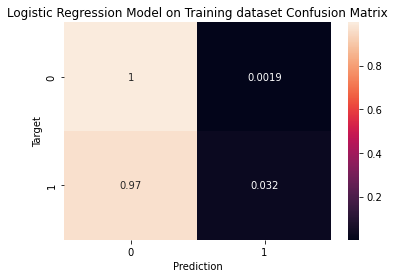

In [96]:
# Train logistic model with 40% of train dataset
training_preds = predict_and_plot(train_inputs, train_target, log_model,'Logistic Regression Model on Training dataset',normalize='true')

In [97]:
confusion_matrix(train_target,training_preds)

array([[93553,   174],
       [ 6553,   220]])

For the training dataset, our logistic regression model has the confusion matrix above, and the explanation is below:

- 93% of the total values have target 0s, and the model also predicted zeros.

- 0.065% of the total values have target 1s, and the model predicted 0.

- 0.17% of the total values have been classified the positive, but they are actually negatives in the target dataset

- 0.22% of the total values have been classified correctly.

From the percentage, the model is not able to predict positives well. 0.22% are the correct classification, yet 0.06% of the total values are the wrong classification. 



🟢 [Back to II. Machine Learning Modelling⇧](#mlm)

#### <a name="2.2.3"></a> 2.2.3 Improve Model

We need to reduce 0.065% down! Since the model incorrectly classified the 1's to 0's, we can increase the class weight for class 1. It means out of 6,773 observations who defaulted credit card payment, only 15 people were correctly classified,

The helper function generates a confusion matrix to demonstrate how well the trained model performs given the input of new data after using the training dataset. 

Accuracy: 93.43%


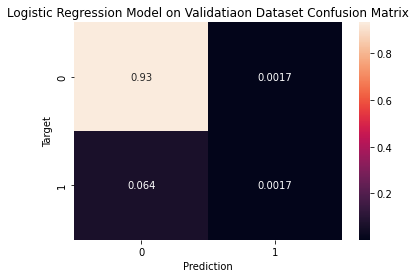

In [98]:
val_preds = predict_and_plot(val_inputs, val_target, log_model,'Logistic Regression Model on Validatiaon Dataset',normalize='all')

We see our model is doing very well on negatives but extremely poorly on positives from the validation dataset. It's not ideal if our project aims to identify those with high risks of defaulting credit card payments.

- 100% of total values are correctly predicted

- 97% of total values are incorrectly predicted 
- 0.18% of total values are incorrectly predicted
- 0.25% of total values are correctly predicted

#### <a name="2.2.3_a"></a> a. Accuracy

Accuracy is a standard metric that shows the overall ability of model performance. It measures the fraction of correct predictions. Specifically, the number of correct predictions is divided by the total number of predictions.

$$ACC = \frac{TP+TN}{TP+FP+TN+FN}$$

Where you can see what the metric focus on the overall ability of the model, it represents the number of data points correctly classified over the total number of data instances.


In [99]:
tn, fp, fn, tp = confusion_matrix(val_target,val_preds).reshape(-1)

In [100]:
# Follow the formula
score_accuracy = (tn+tp)/(tp+tn+fp+fn)
print("The accuracy values is {0:.2f} %".format(score_accuracy*100))

The accuracy values is 93.43 %


In [101]:
# Use Sciki-learn function
print("The accuracy score calculated by the sciki-learn function is the same as above {0:.2f} %".format(accuracy_score(val_target,val_preds)*100))

The accuracy score calculated by the sciki-learn function is the same as above 93.43 %


##### (1) Auccracy Fallacy

However, the accuracy metric may not be a good measure if the dataset is imbalanced. This project aims to identify those who have the most potential of defaulting credit card payment. 93% accuracy seems a high figure. However, it's useless to serve the purpose. Out of 3,253, only 82 were correctly classified by the model, accounting for 2.5%. That's way too low. 3,171 observations might cause the profit loss of £1,585,500 ( assuming they borrowed £500; In HSBC bank, there is no interest rate to charge if you borrow under 500 in debt cards)


#### <a name="2.2.3_b"></a> b. Precision


Other metrics such as **Precision** and **Recall** can help us calculate the true positives



Precision is used when we don't want to overpredict positives. In our case, if we target high precision, and then we would miss some observations that are good but rejected by our algorithms. That means we will mistakenly lose profits . 


$$\text {Precision} = \frac{\text{TP}} {\text{TP + FP}}$$



In [102]:
precision_value = tp/((tp+fp))
print('The precision value is {0:.2f} %'.format(precision_value *100))

The precision value is 50.00 %


Accuracy: 93.43%


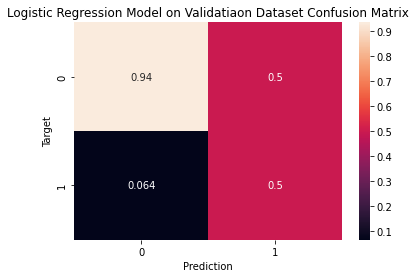

In [103]:
# Change normalize `pred`
val_preds = predict_and_plot(val_inputs, val_target, log_model,'Logistic Regression Model on Validatiaon Dataset',normalize='pred')

50% of precision mean our logistic model will have 50% chance to predict observations that's highly risk of defaulting credit card payment.

In [104]:
score_precision = precision_score(val_target,val_preds)
print('Using Scikit-Learn library, the precision value is {0:.2f} %'.format(score_precision*100))

Using Scikit-Learn library, the precision value is 50.00 %


#### <a name="2.2.3_c"></a> c. Recall

Recall is used when you cannot afford to make any mistakes of missing positives. One practical application demanding high recall is medical diagnosis, such as cancer diagnosis. Because we would rather make mistakes in diagnosing that patients might have cancer. In this case, we can set up rules to do additional tests for those who are potentially diagnosed as having cancer when the results are unclear.

In our project, we choose to have a high recall rate to increase our model performance.


$$\text {Recall} = \frac{\text{TP}} {\text{TP + FN}}$$

In [105]:
recall_value = tp/(fn+tp)
print('The recall value is {}'.format(recall_value))

The recall value is 0.025207500768521365


Accuracy: 93.43%


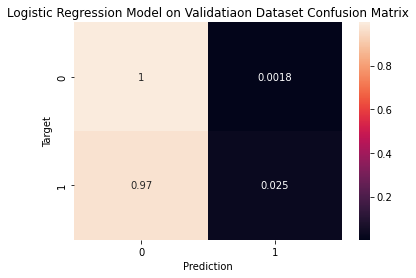

In [106]:
# Change normalize to `true`
val_preds = predict_and_plot(val_inputs, val_target, log_model,'Logistic Regression Model on Validatiaon Dataset',normalize='true')

In [107]:
score_recall = recall_score(val_target,val_preds)
print('Using Scikit-Learn library, the recall value is {0:.2f} %'.format(score_recall*100))

Using Scikit-Learn library, the recall value is 2.52 %


🟢 [Back to II. Machine Learning Modelling⇧](#mlm)

#### <a name="2.2.3_d"></a> d Receiver Operating Characteristic (ROC)


*   [(1) The Origin of ROC](#2.2.3_1)
*   [(2) The Need of ROC](#2.2.3_2)
*   [(3) ROC Basic](#2.2.3_3)
*   [(4) True Positive Rate](#2.2.3_4)
*   [(5) False Positive Rate](#2.2.3_5)
*   [(6) Section Sumary](#2.2.3_6)


#### 🟢 [Skip to 2.3 Decision Tree](#2.3)

You skip the sub-section about threshold, true positive rate, false positive rate, as I tried the pure python way and sciki-learn way to intrepret the concept of the ROC curve from the stractch.

- [6a Ultimate Tutorial: Threshold, True/False Positive Rate](#2.2.6a)


> *   [6a.1 Random Model](#2.2.6a.1)
> *   [6a.2 Ideal Model](#2.2.6a.2)
> *   [6a.3 Putting Everything Together](#2.2.6a.3)
> *   [6b. Section Summary](#2.2.6b)









##### <a name="2.2.3_1"></a>(1) The Origin of ROC

This idea of using ROC was originated from the second world war for evaluating the strength of radar detectors. During the second world war, the main job of radar was to detect if there was a plane coming by capturing signals. It's kind of a machine learning classification problem at the early stage.












##### <a name="2.2.3_2"></a>  (2) We Need ROC 

So far, we have discussed the confusion matrix and its interpretation. However, the confusion matrix is not just fixed. Once you change the probability threshold of the model, it results in many confusion matrices.

![](https://media4.giphy.com/media/3bo7DoY5GEGGzzyFdL/giphy.gif?cid=790b7611661d7c3ca8dfa623e89c5563a8589c2617f61453&rid=giphy.gif&ct=g)

![](https://i.imgur.com/k6rtTZa.png) 


Hence, we need a way to summarize all of the information to analyze the best threshold ---- **ROC graph**! In other words, the ROC graph enables us to identify the best threshold for making decisions.





---

🟠[Back to d.Receiver Operating Characteristic⇧](#2.2.3_d)


##### <a name="2.2.3_3"></a> (3) ROC Basics

The ROC curve is a graph used to evaluate the percentage of **"true positives"** usually short for `tpr` in code, or other names - True Positive Rate, and **false positives** ( `fpr` or False Positive Rate) for different threshold values.  ROC is only applied to classification problems.

>Note: 
>
>Adjusting probability threshold is not particular for logistic regression but also could be used for KNN method

![](https://developers.google.com/machine-learning/crash-course/images/ROCCurve.svg)


The measure demonstrates the capability of a model to distinguish between classes. Simply put, **the score of an excellent model is close to 1, compared with the poor model's score that is near to 0.**




#####  <a name="2.2.3_4"></a> (4) True Positive Rate

- `tpr` or True Positive Rate is known as **Recall**, or **Sensitivity** demonstrates the number of observations correctly identified as positive out of total positives. ( false negatives is the observations that are positive in the actual dataset are classified into the negative group). I like to understand it as the correct positive rate.

$$\text {True Positive Rate (tpr)}=\text {Sensitvity} = \frac{\text{TP}} {\text{TP + FN}}$$

Where TP is the number of $\text{True Positives}$ and  FN the number of $\text{False Negatives}$;

The higher the rate is, the better the model classifier can perform at identifying positives in the dataset.




#####  <a name="2.2.3_5"></a>(5) False Positive Rate

- `fpr` or False Positive Rate is 

$$\text {False Positive Rate (fpr)} =\text{1- Specificity} = \frac{FP}{FP+TN}$$

Where $\text{FP}$ is the number of false positives and $\text{FP}$ is the number of true negatives. `fpr` is also known as $\text{Type I Error}$, meaning the number of items wrongly identified as positive out of total true negatives. I'd like to understand it as the incorrect positive rate.

The higher the false positive rate is, the worse classifier can be to identify the positive in a dataset






🟠[Back to d.Receiver Operating Characteristic⇧](#2.2.3_d)

<a name="2.2.3_6"></a>
##### (6) Section Summary 
In summary, we are interested in two metrics in ROC: **True Positive Rate** and **False Positive Rate**. The goal here is to understand the capability of our model. We aim to minimize the false positive rate and maximize the true positive rate. 

### <a name="2.2.6a"></a> 6a Ultimate Tutorial for Threshold, True/False Positive Rate

🟢 [Skip to 2.3 Decision Tree](#2.3)

Different threshold leads to various the true positive and false positive rates

We can think about the range of these two rates. With the aim in mind, we attempt to maximize the true positive rates and minimize the false positive rates by adjusting the probability threshold. 

The first strategy to tackle this problem is to think about the extreme. Let us hypothetically think when the threshold is 0 and 1, respectively.

`threshold = 0`

When the threshold equals zero, no matter what observations are, the logistic model predicts '1' for all the data, which means the true positive rate is equal to the false positive rate is equal to one. 

`threshold = 1`

When the threshold equals one, no matter what observations are, the logistic model predicts '0' for all data, which means that both true and false positive rates are 0.

If we vary the threshold between these two extremes, we get different false positive and true positive rates.

In [108]:
def tpr_fpr_dataframe(val_target,val_probs):
  scores = []
  thresholds = np.linspace(0,1,101)

  for t in thresholds:
    actual_positive = (val_target == 1)
    actual_negative = (val_target == 0)

    predict_positive = (val_probs >=t)
    predict_negative = (val_probs <t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t,tp,fp,tn,fn))

  columns = ['threshold','tp','fp','tn','fn']
  df_scores = pd.DataFrame(scores,columns = columns)
  df_scores['tpr'] = df_scores.tp/(df_scores.tp+ df_scores.fn)
  df_scores['fpr'] = df_scores.fp/(df_scores.tn+ df_scores.fp)

  return df_scores

In [109]:
val_probs = log_model.predict_proba(val_inputs)[:,1]

In [110]:
actual_positive = (val_target == 1)
actual_negative = (val_target == 0)

predict_positive = (val_probs >=0.5)
predict_negative = (val_probs <0.5)

In [111]:
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
  actual_positive = (val_target == 1)
  actual_negative = (val_target == 0)

  predict_positive = (val_probs >=t)
  predict_negative = (val_probs <t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  scores.append((t,tp,fp,tn,fn))




In [112]:
columns = ['threshold','tp','fp','tn','fn']
df_scores = pd.DataFrame(scores,columns = columns)

In [113]:
df_scores['tpr'] = df_scores.tp/(df_scores.tp+ df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.tn+ df_scores.fp)

We plot a range of thresholds (0 - 1) against True/False positive rate to validate our understanding : **Different threshold leads to various the true positive and false positive rates**

Text(0.5, 0, 'Probability Threshold')

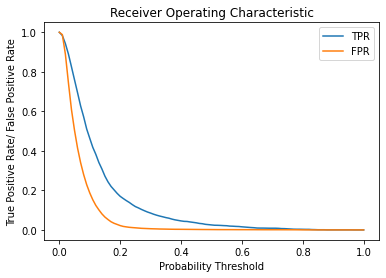

In [114]:
plt.plot(df_scores.threshold, df_scores['tpr'],label ='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'],label ='FPR')
plt.legend()
plt.title('Receiver Operating Characteristic')
plt.ylabel("True Positive Rate/ False Positive Rate")
plt.xlabel("Probability Threshold")

We also can use the method from one of the modules `metric` in `sklearn` package. However, the graph would show a different false positive rate against a true positive rate.

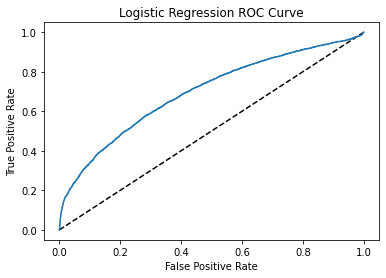

In [115]:


fpr,tpr,thresholds = roc_curve(val_target,val_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

Why did we get a different chart? 

I heard you asked, and you doubt the point I made in the graph above. Be patient and move on. We will discuss 3 different models to test and plot different graphs. The standard graph consists of thresholds against true/false positive to see differences. In the end, we will understand why the chart plotted by `roc_curve` is different and how to read this type of graph.

###### <a name="2.2.6a.1"></a>6a.1 Random Model


The random model could be similar to the one we're handling in real life.

Even if without building a machine learning model or writing scripts for a random number, as we did above any float between 0 and 1, we will still have 50-50 chances. So complete guesswork would stick to 50% without any investment, but in our case, this could be seen as the worst model. 

I love how fitness coaches would encourage people who start workout after years, "That's okay. Everyone starts somewhere."

In [116]:
np.random.seed(42)
y_rand = np.random.uniform(0,1,size=len(val_target))

In [117]:
# accuracy
((y_rand >=0.5) == val_target).mean()


0.49955555555555553

In [118]:
df_rand = tpr_fpr_dataframe(val_target,y_rand)

In [119]:
df_rand[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,3253,46247,0,0,1.000000,1.000000
10,0.1,2923,41615,4632,330,0.898555,0.899842
20,0.2,2602,37000,9247,651,0.799877,0.800052
30,0.3,2255,32340,13907,998,0.693206,0.699289
40,0.4,1931,27690,18557,1322,0.593606,0.598742
50,0.5,1591,23110,23137,1662,0.489087,0.499708
60,0.6,1254,18507,27740,1999,0.385490,0.400177
70,0.7,948,13761,32486,2305,0.291423,0.297554
80,0.8,622,9221,37026,2631,0.191208,0.199386
90,0.9,298,4636,41611,2955,0.091608,0.100244


Text(0.5, 0, 'Probability Threshold')

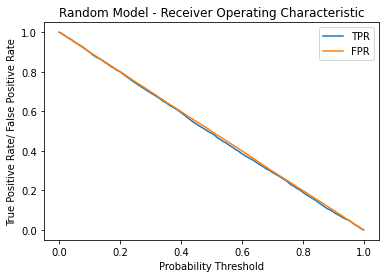

In [120]:
plt.plot(df_rand.threshold, df_rand['tpr'],label ='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'],label ='FPR')
plt.legend()
plt.title('Random Model - Receiver Operating Characteristic')
plt.ylabel("True Positive Rate/ False Positive Rate")
plt.xlabel("Probability Threshold")

As shown in the graph, it's a straight line from the threshold of 0 to 1. Let's say we look at the threshold of 0.6 against 0.4 for both true positive rate and false positive rate. It's almost like throwing a coin.

![](https://i.imgur.com/C5K2kpb.png)

A threshold of 0.6 means 40% of cases predicted by the model in the dataset is defaulting.

Random model is approximately flipping a coin. There are 50% chances that it will be the head. i.e.predicting outcome as 1 for positive, 50% chances it will be tail, i.e. predicting outcome as 0 for negative. A random number is generated between 0 and 1, and if we compare it with `>= 0.5` or `< 0.5`. Out of  100 times the Python try this, typically it will return 50 times `>=0.5` and 50 times `< 0.5`.




🟠[Back to d.Receiver Operating Characteristic⇧](#2.2.3_d)

###### <a name="2.2.6a.2"></a> 6a.2 Ideal Model

The ideal model is another type of benchmark model. By the name, the outputs from an "ideal model" are correctly predicted for every observation. In this case, we can consider an ideal scoring model. 

Suppose we have a group of customers. For each customer, we have predictions generated by our trained model. Then, we sort the prediction scores in order. Suppose the model can classify every observation; the accuracy is 100%. In other words, the model can classify non-defaulting customers as non-defaulting customers, defaulting customers as defaulting customers. By then, our model is ideal.

![](https://i.imgur.com/0zAc8uy.png)

In [121]:
num_neg = (val_target == 0).sum()
num_pos = (val_target == 1).sum()

print("There are {} negatives, {} positives in our dataset".format(num_neg,num_pos))

There are 46247 negatives, 3253 positives in our dataset


In [122]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [123]:
y_ideal_preds = np.linspace(0,1,len(val_target))
((y_ideal_preds>=0.9343) == y_ideal).mean()

1.0

In [124]:
df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_preds)
df_ideal[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,3253,46247,0,0,1.000000,1.000000
10,0.1,3253,41297,4950,0,1.000000,0.892966
20,0.2,3253,36347,9900,0,1.000000,0.785932
30,0.3,3253,31397,14850,0,1.000000,0.678898
40,0.4,3253,26447,19800,0,1.000000,0.571864
50,0.5,3253,21497,24750,0,1.000000,0.464830
60,0.6,3253,16547,29700,0,1.000000,0.357796
70,0.7,3253,11597,34650,0,1.000000,0.250762
80,0.8,3253,6647,39600,0,1.000000,0.143728
90,0.9,3253,1697,44550,0,1.000000,0.036694


Text(0.5, 0, 'Probability Threshold')

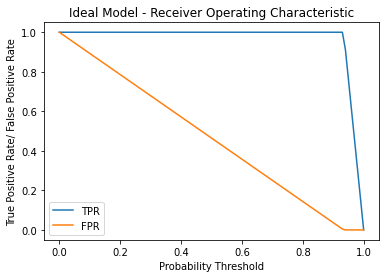

In [125]:
plt.plot(df_ideal.threshold, df_ideal['tpr'],label ='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'],label ='FPR')
plt.legend()
plt.title('Ideal Model - Receiver Operating Characteristic')
plt.ylabel("True Positive Rate/ False Positive Rate")
plt.xlabel("Probability Threshold")

###### More explanation 

As shown in the graph, the true positive rate is always staying at 1 until the true positive rate goes down. The point is our threshold of 0.9343 for the ideal model. Hence the model can correctly identify customers who are likely to default. So the perfect threshold is 0.9343.

![](https://i.imgur.com/fEKELgN.png)

To understand the ideal model better, we also need to look at the other threshold. Let us say we set the threshold of 0.6.


![](https://i.imgur.com/CfUdBFw.png)


As you can see in the graph above, the false positive rate is 39%. It simply means our model is making mistakes if we set our threshold of 0.6. Approximately 33.43% of customers are not defaulting, but our model predicts them as people who are likely to default when using the threshold of 0.6.

🟠[Back to d.Receiver Operating Characteristic⇧](#2.2.3_d)

###### <a name="2.2.6a.3"></a> 6a.3 Putting everything together

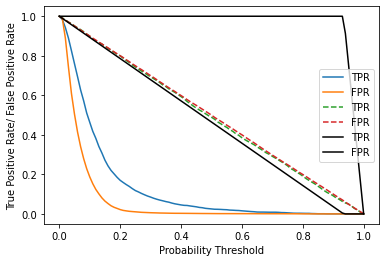

In [126]:
plt.plot(df_scores.threshold, df_scores['tpr'],label ='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'],label ='FPR')

plt.plot(df_rand.threshold,df_rand['tpr'],'--',label='TPR')
plt.plot(df_rand.threshold,df_rand['fpr'],'--',label='FPR')

plt.plot(df_ideal.threshold,df_ideal['tpr'],label='TPR',color ='black')
plt.plot(df_ideal.threshold,df_ideal['fpr'],label='FPR',color='black')

plt.ylabel("True Positive Rate/ False Positive Rate")
plt.xlabel("Probability Threshold")

plt.legend()

In this chart, we can compare our model with the ideal model and random model. The true positive rate from our model should be close to the ideal model as much as possible. we can see this is quite far away.

![](https://i.imgur.com/ODUOnlV.png)


It's not always correct when it comes to the default threshold of 0.5. 


![](https://i.imgur.com/VyEd42H.png)




However, plotting true positive rate/ false positive rate against threshold is not always intuitive. A better way is to plot the true positive rate against false positive rate.

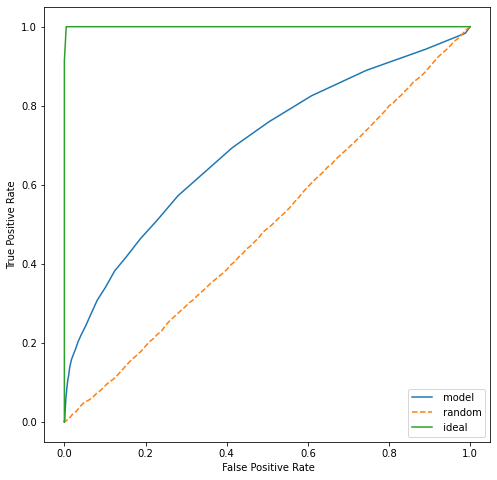

In [127]:

plt.figure(figsize=(8,8))
plt.plot(df_scores.fpr, df_scores.tpr, label =' model')
plt.plot(df_rand.fpr, df_rand.tpr, '--' ,label =' random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label =' ideal')

plt.ylabel("True Positive Rate")
plt.xlabel(" False Positive Rate")

plt.legend()

plt.show();


🟠[Back to d.Receiver Operating Characteristic⇧](#2.2.3_d)

##### <a name="2.2.6b."></a> 6b Section Summary


##### The Standard Graph
![](https://i.imgur.com/OPZCDV8.png)



##### Top Tips of Reading ROC Graph

###### Thinking about Two Extreme Point

![](https://i.imgur.com/ZosG6ld.png)

>1. When the threshold is 0, true positives rate is 100%.  

At this point, the model predicts every customer as 1's(positives). The model thinks all observations are  likely to default in the dataset. At the same time, those who are not likely to default are incorrectly classified into positives. Hence, the false positive rate is also 100%

>2. When the threshold of 1, the model predicts every customers as 0's (negatives)

The model thinks all observations will not default the credit card payment in the dataset. Meanwhile, those positices who are likely to default are incorrectly classified into negatives. Hence, the true positive rate and false positive rate are 0 (because there is no true positives and false positives but ture negatives and false negative

###### Thinking about when Threshold is Changing
![](https://i.imgur.com/SXsz64x.png)

> 3. When the threshold is drecreasing

When the threshold is drecreasing, we start to predict more customers who are not likely to default the credit payment, rather than predicting everyone is not defaulting.(when the threshold is 1)

The false positive rate starts to increase as our model is making mistakes of incorrectly classifying, and yet the true positive rate is also increasing since our model is able to make some correct classification.

> 4. When evaluating classifition model, our aim is always to ensure our model shifting to approximately close to the ideal model. 

All in all,  we aim to strike the balance between true positives rate and false positives rates to find the optimal threhold. We create two benchmark models (the ideal model and the random model) to help us understand how to read ROC curve. 



![](https://i.imgur.com/DD6NVAx.png)


#### <a name="2.2.3_e"></a> e.Area Under the ROC Curve



"How could we get the GOOD model?" I heard you ask. That is why I'm introducing a new metric called Area Under the ROC Curve (AUC-ROC) to you. AUC-ROC is a good metric for evaluating binary classification models.

AUC is a metric that tells us the probability of randomly selected positive instances with a higher score than the score of negative instances that we randomly selected.

In [128]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.6957961816531053

Scikit-learn package is more accuracte because our manual calculation is based on `np.linspace(0,1,101)`.

In [129]:
auc(df_scores.fpr,df_scores.tpr)

0.6954188987664314

In [130]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9998006002213843

Actually, if we want to calcualte the area under the roc curve, we can run this code

In [131]:
fpr, tpr, threshold = roc_curve(val_target, val_probs)
auc(fpr,tpr)

0.6957961816531053

In [132]:
# short cut

from sklearn.metrics import roc_auc_score

roc_auc_score(val_target,val_probs)

0.6957961816531053

##### 2.3.5a Using different ways to calculate AUC metric



###### 5a. Python Naive Calculation of AUC Scores

In [133]:
neg_probs = val_probs[val_target == 0]
pos_probs = val_probs[val_target == 1]

In [134]:
# So we want to randomly select examples we can use random

import random

n = 10000
success = 0

for i in range(n):
  pos_rand_ind = random.randint(0, len(pos_probs)-1)
  neg_rand_ind = random.randint(0, len(neg_probs)-1)

  if pos_probs[pos_rand_ind] > neg_probs[neg_rand_ind]:
    success += 1


success/n

0.698

###### 5.b Numpy Package Calculation of AUC Scores



In [135]:
n = 10000
pos_ind = np.random.randint(0,len(pos_probs),size = n)
neg_ind = np.random.randint(0,len(neg_probs),size = n)

(pos_probs[pos_ind] > neg_probs[neg_ind]).mean()

0.6898

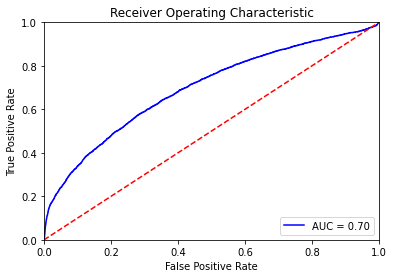

In [136]:
make_auc(log_model,val_inputs,val_target)

🟠[Back to d.Receiver Operating Characteristic⇧](#2.2.3_d)

### <a name="2.3"></a>2.3 Decision Tree


🟢 [Back to II. Machine Learning Modelling⇧](#mlm)

### Section Outline

*   [2.3.1 Introduction](#2.3.1)
*   [2.3.2 Classification Process](#2.3.2)
*   [2.3.3 Decision Tree Metrics](#2.3.3)


> *   [2.3.3a Pruning](#2.3.3a)
> *   [2.3.3b Information Gain (IG) ](#2.3.3b)

*   [2.3.4 Visualizing The Decision Tree](#2.3.4)
*   [2.3.5 Decision Tree Plot Explained](#2.3.5)
*   [2.3.6 Bounus](#2.3.6)
*   [2.3.7 Feature Importance](#2.3.7)


**Quote**
>“The 'knowledge' learned by a decision tree through training is directly formulated into a hierarchical structure. This structure holds and displays the knowledge in such a way that it can easily be understood, even by non-experts.”



#### <a name="2.3.1"></a> 2.3.1 Introdution

Decision trees are supervised machine learning algorithms that solve classification and regression problems. A decision tree is constructed by learning a sequence of **If-Else conditions** about individual features to divide the training data into subsets and eventually infer the label. One of the significant differences from linear models is that tree-based models can capture non-linear relationships between features and labels. In addition, input features to be on the same scale through standardization is unnecessary.


#### Building Blocks

![](https://i.imgur.com/4BxnZh2.png)



- **Node** : A node is a point that involves either a question or a prediction. Those questions are if-else statements in order to split data till the end where a decision tree made predictions for the label.

- **Root** : The root is an initial node at which the tree starts growing. The root node has no parent node, and it involves a question that generates two children nodes through two branches. 

- **Internal Node**: An internal node is a node that not only has a parent, but also gives rise to two children nodes.

- **Leaf** : A leaf is a node that has one parent node but no children node involving no questions. It's where a prediction for an entry is made. The ultimate goal of a decision tree is to produce the purest leaves.

- **max_depth**: In a decision tree, the parameter controls the maximum number of branches to be separated the top (root nodes)from an extreme-end (the leaf). It's a parameter for the `DescirionTreeClassifer()` estimator. It means the number of times for a decision model to split data. The above diagram splits the entire dataset twice so that the `max_depth` is equal to 2. 




#### <a name="2.3.2"></a> 2.3.2 Classification Process

Decision trees begin with the root node and grow by applying splitting conditions at each non-leaf node until reaching the leaf node. The tree models divide the labelled dataset into a homogeneous dataset at the end node.

Induction and pruning are two stages for creating decision tree models. At the induction stage, we build the tree by understanding hierarchical decision boundaries given a labelled dataset. Since the nature of decision models is prone to overfitting, we can remove the unnecessary internal nodes from decision tree models at the pruning stage, reducing the complexity to mitigate overfitting.

#### **Induction**

Step 1 : Begin with a training dataset that has some features and labels.

Step 2:  Pick the "best feature" in the dataset by splitting the data on

Step 3:  Divide the data into subsets by the possible values for this best feature

Step 4:  Recursively generate new nodes using the subset of data created from Step 3. 

Step 5:  Continually split subsets until reaching a point where the node is purest, which is called a leaf node. All samples are divided into the same class.

So information gain is to check how well the node classifies, and the Gini index is a metric that helps the tree pick the best feature and value to split on



#### <a name="2.3.3"></a> 2.3.3 Decision Tree Metrics


[2.3.3a Pruning](#2.3.3a)


*   [(1) Entropy](#2.3.3_1)
*   [(2) Gini Index](#2.3.3_2)
*   [(3) Classification Error](#2.3.3_3)

🟣[Back to 2.3 Decision Tree⇧](#2.3)

##### <a name="2.3.3a"></a> 2.3.3a **Pruning**

- Before you get lost in metrics details, the difference between Information Gain (IG), Gini Index and Entropy is the subject. 
- IG focuses on the purity level at each node, whereas Entropy and Gini Index quantify the impurity. 

There are three common approaches to measure the impurity of a node or a leaf: **Entropy**, **Gini index**, and **Classification Error**.


###### <a name="2.3.3_1"></a> (1) **Entropy** 

Entropy is a method to measure impurity

$$\text{Entropy} = - \Sigma_j p_j log_2 p_j $$


Where $p_j$ the probability of an object being classified to a particular class

When all samples of a node are split into the same class, the value of $\text{Entropy}$ will be 0. 


On the other hand, the entropy reaches the maximum value of 1, when the data is the uniform class distribution. 

![](https://i.imgur.com/2nibZNK.png)

Looking at the chart above, we can see why the entropy of a node is zero when the probability is 1. Because $log(1)=0$. Entropy reaches the maximum value when all classes in the node have equal probability.

Let's think about two situations where the decision tree model is trained to classify unseen data into 2 classes: 

(1) The probability for all examples that are split into the same class is 1 

$$\text{entropy} = -1 \times \log_{2}(1)= 0$$

(2) The probability for all examples that are split into either class is 50% (0.5)

$$\text{entropy} = -0.5 \times \log_{2}(0.5)-0.5 \times \log_{2}(0.5) $$
$$=-0.5 \times -1 - 0.5 \times (-1) $$
$$=0.5+0.5 = 1$$







###### <a name="2.3.3_2"></a>(2) **Gini index** 

Gini index is a criterion to minimize the probability of misclassification.

The `Gini` value in each box. It is **the loss function** used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0.

$$\text{Gini} = 1 - \Sigma_j p_j^2$$

$$\text{Gini} = 1- (p_1^2+p_2^2) = 1-{0.5}^2 +{0.5}^2) = 0.5$$


Where $p_j$ the probability of an object being classified to a particular class

###### <a name="2.3.3_13"></a>(3) **Classification Error**

$$ \text{ClassificationError} = 1 - maxp_j$$ 


Where $p_j$ the probability of an object being classified to a particular class

🟣[Back to 2.3 Decision Tree⇧](#2.3)

##### 2.3.3b Information Gain (IG)

Information Gain(IG) can help us identify the purest node. We have learned that the tree model learns patterns and features in such a way to produce the **purest** leaf.

![](https://i.imgur.com/GlToCrj.png)

- **f** : feature

- **sp** : split point

As nodes grow recursively, the obtention of an internal node or a leaf depends on the state of its predecessors. At each node, a question a tree asks involves one feature `f` and splits data with a point `sp`, aiming at the largest information gain(IG).


$$\text{IG(f, sp} =  \text{I(parent)} - \biggl(\frac{N_\text{left}}{N} \times \text{I(left)} + \frac{N_\text{right}}{N} \times \text{I(right)}\biggl)$$


We repeat this splitting procedure at each child node down to the empty leaves. In other words, the procedure will not pause until all samples belong to the same class.



In [137]:
# Instantiate decision tree classifier
tree = DecisionTreeClassifier(random_state=42)


In [138]:
# Set entropy as criterion method
tree.criterion='gini'

In [139]:
# Use .fit() method to train the model 
tree.fit(train_inputs,train_target)

tree_train_preds= tree.predict(train_inputs)

train_probs = tree.predict_proba(train_inputs)

# Use .predict() method to make predictions with train dataset
tree_train_preds = tree.predict(train_inputs)

In [140]:
tree.tree_.max_depth

39

`.max_depth()` is 39 meaning the classifier we created splited the entired dataset 39 times to produce a leaf ( the prediction)

#### <a name="2.3.4"></a>2.3.4 Visualizing The Decision Tree



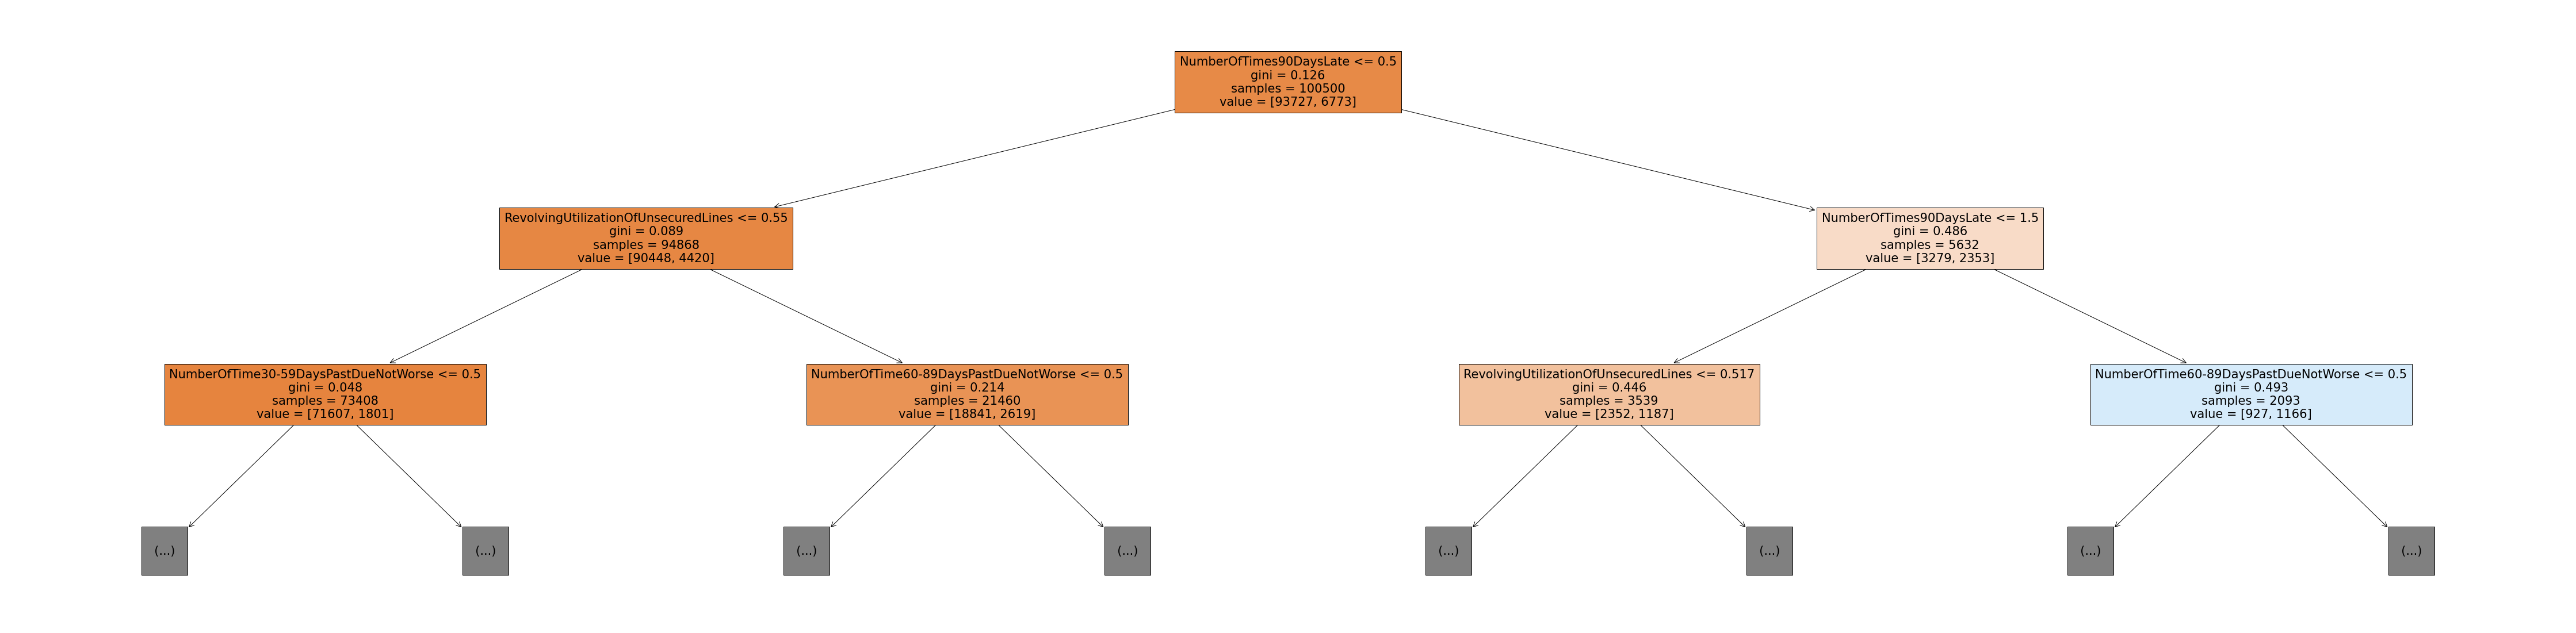

In [141]:
# Visualize Tree Structure
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree, export_text
%matplotlib inline


# Plot Trees
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=2, filled=True);

🟣[Back to 2.3 Decision Tree⇧](#2.3)

#### <a name="2.3.5"></a>2.3.5 Decision Tree Plot Explained

##### `NumberOfTimes90DaysLate <= 0.5`

The root node is at the topmost, which using the feature`NumberOfTimes90DaysLate` to split the dataset, and the split point is 0.5, meaning that the tree asks a question if an observation's data for the feature is smaller than or equal to 0.5, then each observation either goes to the `True` branch or the`False` branch.

##### `gini =0.126`

The Gini score is a metric to evaluate the purity of a node or a leaf. In general, the smaller the Gini score is, the pure the node or leaf can be. The `gini =0` means the node is pure, indicating that the node only contains a single class of samples. 

##### `value = [93727, 6773]`

At the top node, the total number of samples is 100,500 in the `train_inputs`. Then, we can look at the list `value =[93727, 6773]`. 

out of 100,500 samples, 932,727  fall into class 0. This dataset means they did not default the credit payment. Otherwise, 6,773 are designated class 1, indicating that they defaulted the credit payment.

##### Understanding How a Tree Makes a Split

I was confused by seeing these two figures, 93,727 and 94,868. Only 94,868 samples responded `True`  because of the split point( `NumberOfTimes90DaysLate <= 0.5`). In other words, 94,868 samples contain the column `NumerOfTimes90DaysLate` that is smaller than or equal to 0.5. On the other branch,  5,632 samples consist of one column `NumberOfTimes90DaysLate` that is greater than 0.5.


At each node, the tree model would pick up one feature by computing the Gini index to gain the smallest value of the Gini index or computing information gain.


In [142]:
tree_text = export_text(tree, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:5000])

|--- NumberOfTimes90DaysLate <= 0.50
|   |--- RevolvingUtilizationOfUnsecuredLines <= 0.55
|   |   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.50
|   |   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.50
|   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.21
|   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 2.50
|   |   |   |   |   |   |--- age <= 47.50
|   |   |   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 36.00
|   |   |   |   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 9.50
|   |   |   |   |   |   |   |   |   |--- DebtRatio <= 8566.00
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 77887.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 28
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  77887.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- DebtRatio >  8566.00
|   |   |   |   |   |   |   |   |   |   |--- ag

🟣[Back to 2.3 Decision Tree⇧](#2.3)

#### <a name="2.3.6"></a>2.3.6 Bounus 

`accuracy_score()` is actually from the `sklearn.metrics` module, whereas `DecisionTreeClassifier().score` is from the estimator score method. In this case, it's from the `DecisionTreeClassifier()` estimator. 

When using the **estimator score method**, you need to input the features,  target labels; the estimator class would perform the `.predict()` action on the class, and it returns scores. 

However, `accuracy_score()` is required to input target labels, and predicted labels. It focuses on prediction errors. 

All in all, they're doing similar jobs with different aims. `.score()` helps you get the overall accuracy of a model without explicitly writing `tree_val_preds= tree.predict(val_inputs)` , whereas `accuracy_score()` is when your project is at the stage of model validation.

For our decision tree, it occurs **overfitting**. 

In [1]:
#accuracy_score(train_target, train_preds)

In [144]:
tree.score(val_inputs, val_target)

0.8988484848484849

Accuracy: 89.88%


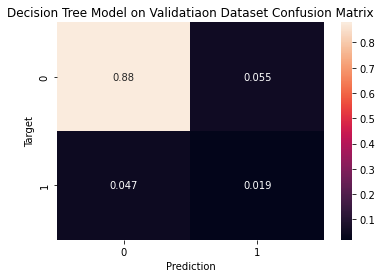

In [145]:
val_preds = predict_and_plot(val_inputs, val_target, tree,'Decision Tree Model on Validatiaon Dataset')

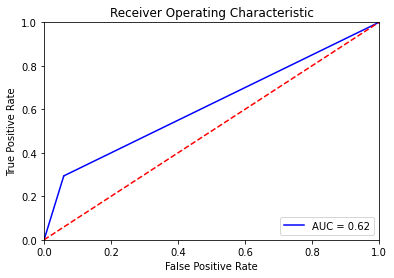

In [146]:
make_auc(tree,val_inputs,val_target)

🟣[Back to 2.3 Decision Tree⇧](#2.3)

#### <a name="2.3.7"></a> 2.3.7 Feature Importance

In [147]:
# Check feature importance
tree_importances = tree.feature_importances_

tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

tree_importance_df

,feature,importance
3,DebtRatio,0.204792
0,RevolvingUtilizationOfUnsecuredLines,0.190956
4,MonthlyIncome,0.143578
6,NumberOfTimes90DaysLate,0.130062
1,age,0.121720
5,NumberOfOpenCreditLinesAndLoans,0.082087
9,NumberOfDependents,0.037517
2,NumberOfTime30-59DaysPastDueNotWorse,0.035177
7,NumberRealEstateLoansOrLines,0.027625
8,NumberOfTime60-89DaysPastDueNotWorse,0.026485


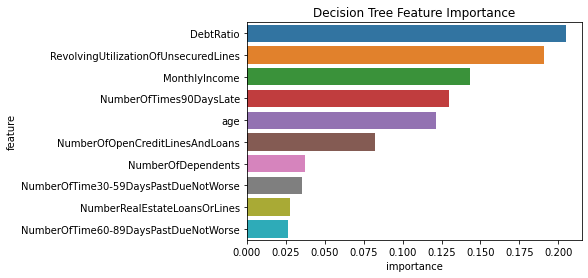

In [148]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

🟣[Back to 2.3 Decision Tree⇧](#2.3)

### <a name="2.4"></a>2.4 Random Forests
🟢 [Back to II. Machine Learning Modelling⇧](#mlm)

### Section Outline

*   [2.4.1 Why Random Forest](#2.4.1)
*   [2.4.2 Build Random Forest](#2.4.2)
*   [2.4.3 Random Forest Model Mechanism](#2.4.3)
*   [2.4.4 Evaluate Random Forest Model](#2.4.4)
*   [2.4.5 Visualizing Random Forest Model](#2.4.5)
*   [2.4.6 Explain AUC and ROC Curve](#2.4.6)




### Introduction

Random Forest is a machine learning algorithm for solving classification and regression problems. The random forest model is built upon decision trees. We have to understand what an ensemble is. An ensemble is a noun that represents a group of predictors (classifiers or regressors). Ensemble Learning is a technique for aggregating all classifiers or regressions to achieve higher accuracy. Don't be confused by seeing `an Ensemble Learning algorithm", also known as ' an Ensemble method", because it's an umbrella term to cover everything.


By the name, the random forest model consists of multiple decision trees. The difference between decision trees and the random forest is the feature selections. Essentially, random forest is an ensemble method based on a large number of decision trees. A quote can summarize the logic of the random forest model, 'The wisdom of crowds.

I believe you now have a better understanding of how a decision tree works. Despite the high interpretability in the decision tree model, a single decision tree could perform poorly due to the lack of flexibility when handling unseen data. 


The design of the random forest model is to combine the decision tree model's sensitivity with the random selecting samples with the replacement. However, random forest uses the same training algorithm for every classifier and train them on different random subsets of the training set. The sampling process with replacement is called  **Bagging** (short for Bootstrap Aggregating). If sampling is without replacement, we call the process Pasting. 

You may ask why we need bagging and why didn't we train on the original training set? 

Because we don't want to encounter high bias and variance. Each individual predictor has a higher bias than the one trained on the whole original training set, but if each predictor can be trained on different subsets of training sets, aggregation can reduce the bias and variance. 

Bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor. 

Firstly, the random forest model creates a bootstrapped subset with the replacement. It means a single data entry could appear in the bootstrapped dataset more than once. Secondly, the model randomly selects features out of the total features. The rest is applying the mechanism of a decision tree to select the feature that produces the best split by computing the Gini index of selected features one by one. ( The lower, the better). Lastly, you have completed a random forest model with a training dataset. 

#### <a name="2.4.1"></a> 2.4.1 Why Random Forest

- Random forest model combines the interpretability of the decision tree with flexibility.

The decision tree model has high interpretability, but the drawback is that it cannot handle unseen data well due to the design. The decision tree would run thoroughly each feature and compute the impurity to gain the best split, which results in high correlation. However, the randomness is applied to random forest resulting in a vast improvement in accuracy. In other words, it can handle unseen data better.


- Random forest model strikes a balance between high variance and high bias models

A high bias model such as linear models captures the general trends but easily ignores tiny details. 


#### <a name="2.4.2"></a> 2.4.2 Building Random Forests Model

Similarly, we are using `sklearn` library to train our model to get the estimates of parameters of the algorithm. 

🟡 [Back to 2.4 Random Forest⇧](#2.4)

#### <a name="2.4.3"></a> 2.4.3 Random Forest Model Mechanism 


Step 1: Boostrap Aggregating

Random forest would create a bootstrapped sample to fit a decision tree model

![](https://pbs.twimg.com/media/FGQfHVGX0AIGYNB?format=png&name=medium)

Step 2: Feature Sampling

a subset of features would be randomly selected to compute the impurity so as to split the dataset

![](https://i.imgur.com/Seu5kgM.png)

Step 3: Bagging

Bagging means the model bootstraps the data and aggregates all predictions to result in the final decision. A prediction would be made by one decision tree. Each prediction from a decision tree is a vote. 

![](https://i.imgur.com/amEIT5i.png)


Step 4: Repeat Step 1



Once we finish the building random forest, we can move into the next stage : evaluating our random forest

In [149]:
# Create the model
rf_clf = RandomForestClassifier(random_state=42)

In [150]:
%time
# Fit data to model to get parameters
rf_clf.fit(train_inputs,train_target)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


RandomForestClassifier(random_state=42)

🟡 [Back to 2.4 Random Forest⇧](#2.4)

#### <a name="2.4.4"></a> 2.4.4 Evaluate Random Forest Model

In [151]:
rf_clf.score(train_inputs,train_target)

0.9996019900497513

In [152]:
rf_clf.score(val_inputs,val_target)

0.9367878787878788

Once again, the training accuracy is almost 100%, but the validation accuracy is much better this time. It is better than the best single decision tree we have trained so far. 

#### <a name="2.4.5"></a> 2.4.5 Visualize the Random Forest Model

🟡 [Back to 2.4 Random Forest⇧](#2.4)

I used the parameter `rf_model.estimators_[0]` to see the first decision tree. It's exactly the same as the decision tree to split data based on the features. however, what i trained was a regular random forest. In other words, it still tries to find the best feature to split the data best.

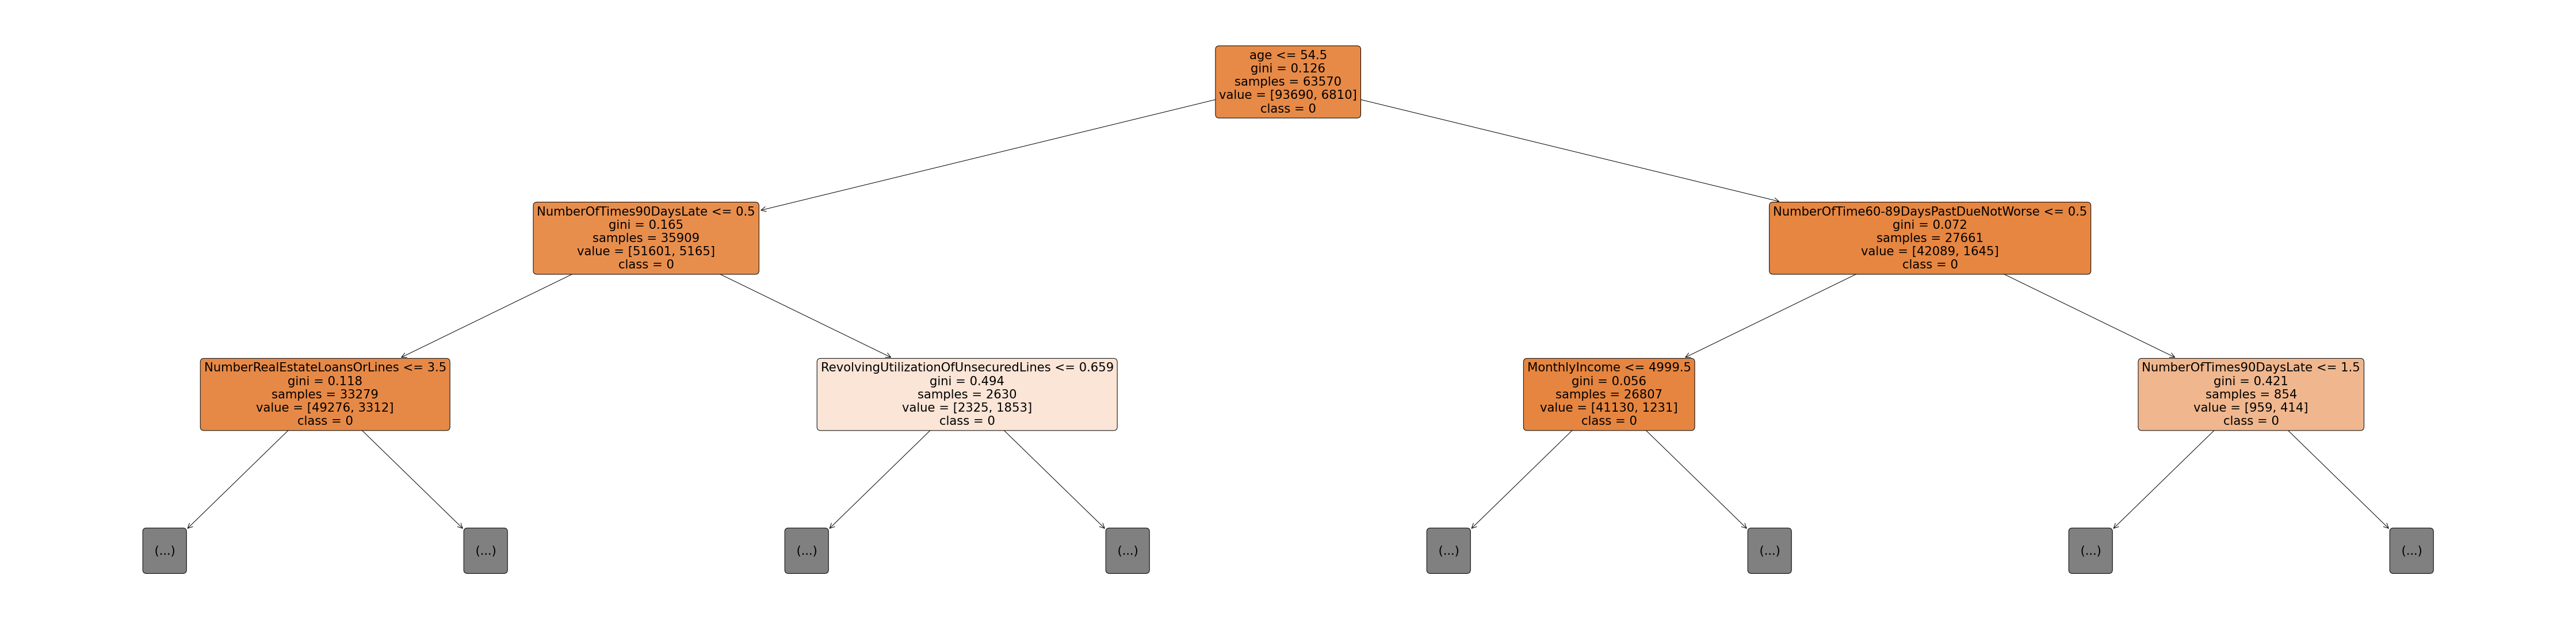

In [153]:
plt.figure(figsize=(80,20))
plot_tree(rf_clf.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=[str(x) for x in rf_clf.classes_]);

It's still the same as the confusion matrix. If you have rough ideas about understanding confusion matrix, you can have a look 2.2.a Confusion Matrix. 

The explaintion here is we can see the classifier isn't not doing a really good job at spoting the postives. 81% of positives were predicted to the negative. In our business case, our algorithm would lend money to these customers with high risks, resulting in loss in profits. 

Accuracy: 93.68%


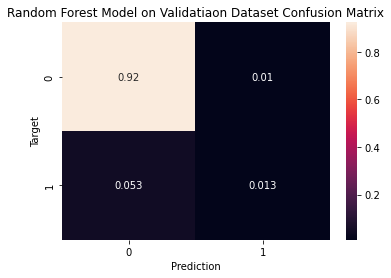

In [154]:
val_preds = predict_and_plot(val_inputs, val_target, rf_clf,'Random Forest Model on Validatiaon Dataset')

#### <a name="2.4.6"></a> 2.4.6 Explain AUC and ROC curve

As discussed previously, AUC is a single number that tells us the probability of randomly selected positive instances with a higher score than the score of negative instances that we randomly selected.


We have the ideal model and the random model. From this chart, we have an AUC of 84%. 100% is the ideal situation where every instance is correctly classified with no mistakes. 

- AUC of the logistic regression model: 70%
- AUC of the decision tree model: 64%
- AUC of the random forest model: 84%

These statistics demonstrate that random forest performs better in classifying positives from the dataset without any hyparameter tuning. 

In [2]:
make_auc(rf_clf,val_inputs,val_target)

NameError: ignored

🟡 [Back to 2.4 Random Forest⇧](#2.4)

### <a name="2.5"></a>2.5 Gradient Boosting Machines with XGBoost

🟢 [Back to II. Machine Learning Modelling⇧](#mlm)

### Section Outline

*   [2.5.1 XGBoost Introduction](#2.5.1)
*   [2.5.2 XGBoost Evolution](#2.5.2)


>  *  [(1) Decision Tree](#2.5.2_1)
>  *  [(2) Boostrap Aggregating (Bagging)](#2.5.2_2)
>  *  [(3) Random Forest](#2.5.2_3)
>  *  [(4) Boosting](#2.5.2_4)
>  *  [(5) Gradient Boosting](#2.5.2_5)
>  *  [(6) Extreme Gradient Boosting (XGBoost)](#2.5.2_6)




*   [2.5.3 Why XGBoost?](#2.5.3)

> *  [a. Speedy Computing](#2.5.3_1)
> *  [b. Impressive Performance](#2.5.3_2)
> *  [(c. Community Fabourite](#2.5.3_3)

*   [2.5.4 Train XGBoost](#2.5.4)
*   [2.5.4 Evaluate XGBoost](#2.5.5)
*   [2.5.5 Explain ROC and AUC Curve](#2.5.6)

#### <a name="2.5.1"></a> 2.5.1 Introducting XGBoost

XGBoost is a machine learning algorithm using the decision tree ensemble method under the gradient boosting framework. In machine learning, we always need to ask about the types of problems we're solving. **Is this a prediction problem or a classification problem? **

It leads to the following question: what types of dataset do we have?

A dataset is either structured or unstructured. Unstructured data usually involves images, text, audio etc. In this case, artificial neural networks are possibly a better technique to choose. On the other hand, structured data usually refers to tabular data; tree-based algorithms could be the best approach intuitionally. 

Whenever we're solving any machine learning problems, these 3 questions are inevitable. 

1. What types of machine learning problems? (supervised learning or unsupervised learning)
2. Is this a prediction problem or a classification problem?
3. What data structures are the dataset we have?


⚫️ [Back to 2.5  Gradient Boosting Machines⇧](#2.5)

#### <a name="2.5.2"></a> 2.5.2 XGBoost Evolution 

![](https://i.imgur.com/A1ADIoB.png)



##### <a name="2.5.2_1"></a> (1) Decision Trees

In this notebook, we previously discussed the decision tree model on the infrastructure. Here I wanted to summary what a decision tree model is in a sentence

> A graphical representation of possible solutions to a decision based on certain conditions



##### <a name="2.5.2_2"></a>( 2) Boostrap aggregating (Bagging)

Bagging is an ensemble method using a meta-algorithm to combine predictions from multiple decision trees through a majority voting mechanism. I think it's more like the modified version of decision tree models



##### <a name="2.5.2_3"></a>( (3) Random Forest

In this notebook, we discuss the random forest model a lot. A random forest model is a bagging-based algorithm that randomly selects a subset of features. A decision tree model would go through each feature thoroughly, whereas a random forest model would randomly select features and aggregate the results





##### <a name="2.5.2_4"></a>( (4) Boosting

Boosting is not a specific machine learning algorithm but a concept that can be used to a set of machine learning models. Boosting model is an ensemble meta-algorithm built sequentially by minimizing errors from previous models and increasing the influence of high-perfromence models



##### <a name="2.5.2_5"></a>( (5) Gradient Boosting

Within the gradient descent framework, gradient boosting models minimize errors in sequential models



##### <a name="2.5.2_6"></a>( (6) Extreme Gradient Boosting (XGBoost)

It's actually gradient boosting but using optimized gradient boosting algorithm through parallel processing, tree-pruning, handling missing values and regularization to avoid overfitting/bias




⚫️ [Back to 2.5  Gradient Boosting Machines⇧](#2.5)

#### <a name="2.5.3"></a> 2.5.3 Why XGBoost?

In a sentence, XGBoost is a super-optimized gradient descent and boosting meta-algorithm. XGBoost combines a batch gradient descent method and a penalty for model complexity; however, it typically only applies to one type of machine learning algorithm –
decision trees.

#####  a. Speedy Computing 

Speed and performance are what make XGBoost great. XGB algorithm makes good use of the modern multi-core computer to be parallelizable. It makes the algorithm feasible to train models on very large datasets. 


##### b. Impressive Performance

The performance of XGBoost rarely disappoints the ML community, and it often outperforms almost all the single-algorithm methods in machine learning competitions. 


##### c. Community Favourite

XGBoost(Extreme Gradient Boosting) is very popular with many data scientists in machine learning library. Most of the time, XGBoost can provide the best results among many models. Originally, XGBoost was developed as a C++ command-line application. The ML community started to apply XGBoost into production work after XGBoost won a popular machine learning competition. 

⚫️ [Back to 2.5  Gradient Boosting Machines⇧](#2.5)

#### <a name="2.5.4"></a> 2.5.4 Train XGBoost model

Use `sklearn` library to train XGBoost classification model.

In [156]:
xgb_clf = XGBClassifier(n_jobs=4)
xgb_clf.fit(train_inputs,train_target)

XGBClassifier(n_jobs=4)

Use `.predict` method to make some predictions from the XGBoost model we just trained above

In [157]:
train_preds = xgb_clf.predict(train_inputs)

In [158]:
# evaluate predictions on training dataset
accuracy = accuracy_score(train_target, train_preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 93.79%


⚫️ [Back to 2.5  Gradient Boosting Machines⇧](#2.5)

#### <a name="2.5.5"></a> 2.5.5 Evaluate XGBoost

Although we have the same accuracy on the validation set as the decision tree model's, the confusion matrix showed a different classifier performance. 

Let's look at precision, recall for the XGBoost model. 

- Precision: 60%
- Recall: 19%

XGBoost model has higher precision than random forest, which means that the XGBoost classifier has a stronger ability to identify true positives than the random forest.

Accuracy: 93.68%


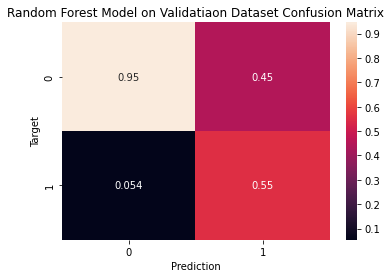

In [159]:
val_preds = predict_and_plot(val_inputs, val_target, rf_clf,'Random Forest Model on Validatiaon Dataset',normalize='pred')

Accuracy: 93.88%


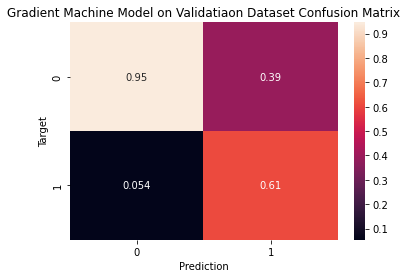

In [160]:
val_preds = predict_and_plot(val_inputs, val_target, xgb_clf,'Gradient Machine Model on Validatiaon Dataset',normalize='pred')

⚫️ [Back to 2.5  Gradient Boosting Machines⇧](#2.5)

####<a name="2.5.6"></a> 2.5.6 Explain ROC and AUC curve

So far, the AUC of XGBoost is the highest one meaning the XGBoost classifier is the best one to classify the dataset correctly.

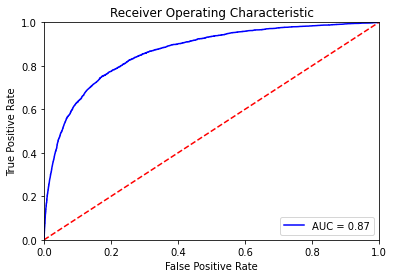

In [161]:
make_auc(xgb_clf,val_inputs,val_target)

## <a name="hptn"></a>III. Hyperparameter Tuning

[Back to Table of Contents ⏫](#table)


*   [3.1 Introduction to Hyperparameters](#3.1)


> * [3.1.1 Hyperparameter and Parameter](#3.1.1)
> * [3.1.2 Optimizing Framework](#3.1.2)


*   [3.2 Manually Tuning Hyperparameters](#3.2)

> * [3.2.1 Key Hyperparameters](#3.2.1)
> * [3.2.2 Evaluate Tuned Models](#3.2.2)

*   [3.3 Automating Tuning Hyperparameters](#3.3)
> * [3.3.1 Grid Search](#3.3.1)
> * [3.3.2 Save Model](#3.3.2)
> * [3.3.3 Access the Best Model](#3.3.3)

*   [3.4 Section Summary](#3.4)

Previously, we have found out XGBoost model has the highest AUC score and the best ability to classify datasets with the highest precision rate correctly. Our next step is to improve the XGBoost model by tuning the best hyperparameters. 

### <a name="3.1"></a> 3.1 Introduction to Hyperparmeter

Parameter tuning is a state-of-art in machine learning. If someone asked you about how to get the optimal parameter, you could answer "It depends on how much time we have." Hyperparameter tuning is a complex time-consuming step before deploying the tuned model. The mathematics underlying is embedded in the code libraries, you can read more about it [here](https://xgboost.readthedocs.io/en/stable/), just in case you're interested.



#### <a name="3.1.1"></a> 3.1.1 Hyperparameter and Parmeter

Before diving into the dark art of tuning hyperparameters, we have to understand some basics about hyperparameters and parameters. It is easy to confuse newcomers to the machine learning space by seeing `hyperparameter` and `parameter`. I was there for ages until I found out the way to understand. 





🟤 [Back to III Hyperparameter Tuning⇧](#hptn)


##### a. Context is the King

We need to be aware of what contexts we are in when it comes to parametesr. There are 3 major areas such as computer science, mathematics& statistics, domain knowledge. We need to be sure about what domain areas we are talking about when thinking about problems or discussing with others


![](https://i.imgur.com/Zbl5YH0.png)

##### b. Sciki-learn Library

Sometimes we are confused when reading "parameter" on the  scikit learn documentation. Some doubts would pause our thought process and associate the `parameter` here with the `hyperparameter`. Nevertheless, they are different!

![](https://i.imgur.com/ufJwhGy.png)


When reading technical documentation, the term **"parameters** is in the programming world, and it refers to the function written in `sklearn` library to control some basic functionality. When you insert some values to parameters, the whole thing (parameter + value) is called an argument. You pass an argument to the function you just called. e.g. `n_estimators` controls the number of decision trees. Or `pd.rename(columns={"unamed":"Id")`

>In scikit-learn, an estimator is an object that fits a model based on the input data (i.e. training data) and performs specific calculations that correspond to properties on new, unseen data. In other words, an estimator can be a regressor or a classifier.
>
> As you may guess, the estimator in `n_estimators` refers to a decision tree



##### c. Statistics
In statistics, `parameter` refers to a number that describes the data from a population, which is different from the statistic that describes the data from a sample. Numbers usually have names such as mean, standard deviation.


![](https://i.imgur.com/aSQohcT.png)

Check out this video to see more. [Link](https://youtu.be/mtbJbDwqWLE?t=32)

##### d. Machine Learning
From my understanding, in the context of machine learning, `hyperparameter` refers to things that we can modify in order to generalize data better by indirectly tweaking parameters or weights of models using the unseen dataset ( validation dataset, test dataset). For example, we will create a model by running the class. e.g. `tree = DecisionTreeClassifier(random_state=42)`. Then we will use the method `.fit()` to feed the training dataset ( `train_input` and `train_target`) to a learning algorithm. The algorithm will try serval values of parameters of the model to model the best relationship between independent variables and a dependent variable. After this, we get a model armed with coefficients ( or weights) and loss values to measure how well our model fit. This is where hyperparameter tuning comes into place. 


* In programming, we call the model a class, and in machine learning, we call the model an estimator.



#### <a name="3.1.1"></a>  3.1.2 Optimizing Framework


Fundamentally, we try to find the sweet spot where the model is complex enough with less bias and fitting the training data on the right level.

![](https://i.imgur.com/SGfE5ly.png)


We have two ways to tune hyperparameters, manually tuning and automatically tuning. There are many methods to help find the optimal values of coefficients of the model. In this project, I used the grid search method.


### 3<a name="3.2"></a> .2 Manually Tuning Hyperparameter

* [3.2.1 Key Hyperparameters](#3.2.1)
>*   [a.Learning Rate](#3.2.1.a)
>*   [b.Max depth](#3.2.1.b)
>*   [c.n_estimators](#3.2.1.c)
* [3.2.2 Evaluate Tuned Models](#3.2.2)



Since our XGBoost model is tree-based, we would have 7 tunable parameters as follows:

- learning rate: this affects the model's speed fitting the residual error. e.g. a high learning rate will require more or less boosting rounds to achieve the same reduction in residual error as an XGBoost model with a low learning rate

- gamma: this parameter controls  if a given node on a base learner will split based on the expected reduction in the loss that would occur after performing the split, which results in fewer splits if this parameter has high values.

- lambda: l2 regularization. L2 regularization is a much smoother penalty that l1 and causes leaf weights to smoothly decrease, instead of enforcing strong sparsity constraints on the leaf weights as in l1 regularization.

- alpha: known as l1 regularization. This parameter is a penalty on leaf weights rather than on feature weights. It means a higher alpha value leads to more robust L1 regularization, which causes leaf weights in the base learner to go to 0

- max_depth: this parameter affects the maximum number of branches each tree can grow during any boosting round. It must be a positive integer value

- subsample: This parameter controls the fraction of the total training set that can be used for any given boosting around. It must be a value between 0 and 1. If the value is low, the model may have a problem with underfitting because a small fraction of the total training set is used for each boosting round. Overfitting may occur if the value is high 

- colsample_bytree: the parameter controls the fraction of features. As we know from the random forest, feature selection is random. The value must be between 0 and 1. A large value means that almost all features can build a tree during a given boosting around. Fewer features would be selected to train the model for a small value. Smaller `colsample_bytree` can consider giving additional regularization to the model, because using all columns may lead to an overfitting trained model.


This section will focus on tuning `learning_rate` and `max_depth`. The first step is to figure out how to build a learning curve.

🟤 [Back to III Hyperparameter Tuning⇧](#hptn)

#### <a name="3.2.1"></a> 3.2.1 Key Hyperparameters



In this sub section, it aims to gain an intutive understanding by building curves for `learning_rate`, `max_depth` and `n_estimators`. `make_curve()`, `plot` are functions written by me to achive the goal. You can see how they're designed at the section **1.3 Helper functions**

###### <a name="3.2.1.a"></a> a. Learning Rate

learning rate controls the iteraction of model to fit the residual error. In XGBoost, higher learning rate wil achieve the same reduction in residual error with less boosting rounds comparing to an XGBoost model with a low learning rate.

In [162]:
%%time
eta_list = np.linspace(0.01,2, num=30)

make_curve(eta_list)

CPU times: user 4min 24s, sys: 1.98 s, total: 4min 26s
Wall time: 2min 40s


###### a.Learning Rate Chart Analysis

Above the learning curve, the line is flat, meaning the accuracy stays at 0.93x roughly, until the learning rate increases to 1.588x. The accuracy fluctuates, followed by a big drop when the learning rate is over 1.93. So it's reasonable to choose the average learning rate. 

###### <a name="3.2.1.b"></a> b. Max depth

max_depth controls branches of each estimators (decision tree) to grow for each boosting rounds. i.e. the number of internal nodes from the root node to leaf node (the prediction of the model)

In [163]:
%%time

## Optimize the best value for max_depth

max_depth_list = np.arange(1,30)
learning_rate = 0.07862069

make_curve(max_depth_list, eta_rate=learning_rate)

CPU times: user 25min 37s, sys: 17.4 s, total: 25min 55s
Wall time: 14min 2s


###### b.Max Depth Chart Analysis
Having analysed the chart carefully, we understand the highest point of accuracy when the `max_depth` is 3. After that, the accuracy goes down as `max_depth` increases. 

###### <a name="3.2.1.c"></a> c. `n_estimators`

`n_estimators` 

As said previously,  `n_estimators` controls the number of decision trees in tree-based models.

Depending on the problem type, an estimator is either a regressor or a classifier. In programming, an estimator is an object on which we perform the `.fit()` method with the input data (i.e. training data), and internally the Scikit-learn library will perform specific calculations that correspond to properties on new, unseen data. i.e. we can use our trained models to perform `.predict()` to make predictions and validate the performance.

The estimator in `n_estimators` refers to the number of decision trees. 

In [164]:
%%time
## Optimize the best value for n_estimator

learning_rate = 0.07862069
max_depth=3

n_estimators_list = np.arange(100,2100,100)


make_curve(n_estimators_list, eta_rate=learning_rate,max_depth=max_depth)

CPU times: user 32min 1s, sys: 16.1 s, total: 32min 17s
Wall time: 17min 16s


###### c.1 100 - 2100 `n_estimators` Chart Analysis

As we can see, after `n_estimator` of 100, the accuracy goes down as the decision tree grows. We need to see the changes in accuracy when `n_estimators` from the range of 1 to 100.

In [165]:
%%time
## Optimize the best value for n_estimator

learning_rate = 0.07862069
max_depth=3

n_estimators_list = np.arange(1,100,10)


make_curve(n_estimators_list, eta_rate=learning_rate,max_depth=max_depth)

CPU times: user 44.4 s, sys: 377 ms, total: 44.8 s
Wall time: 24.2 s


###### c.2 1-100 `n_estimators` Chart Analysis

Clearly, we can detemine that the best value is 100 for `n_estimators` combining the two charts above.

#### <a name="3.2.2"></a> 3.2.2 Evaluate Tuned Models

After manually tunning, we have an accuracy score of 93.86%, which is worse than the one without tuning, 93.88%. It demonstrates that our manual tuned model does not change that much. But accuracy score is lower than 0.01%. It means there isn't a huge difference in manual tuning hyperparameters 

In [166]:
#Tuned Model
tuned_xgb_clf = XGBClassifier(n_jobs=4,learning_rate=0.07862069,max_depth=3,n_estimators= 100)

# Fit the model 
tuned_model = tuned_xgb_clf.fit(train_inputs, train_target)
# Predictions
train_preds = tuned_model.predict(train_inputs)
val_preds = tuned_model.predict(val_inputs)

# Accuracy scores
tuned_train_score = accuracy_score(train_target,train_preds)
tuned_val_score = accuracy_score(val_target,val_preds)

print("After tuning, the accuracy score on the training set is {}.\nThe accuracy score on the validation set is {}".format(tuned_train_score,tuned_val_score))

After tuning, the accuracy score on the training set is 0.9376417910447761.
The accuracy score on the validation set is 0.9386464646464646


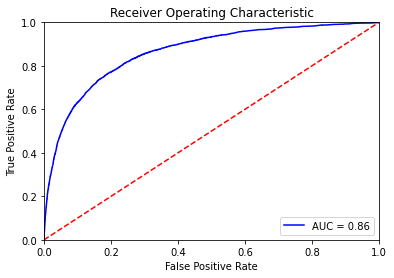

In [167]:
make_auc(tuned_model,val_inputs,val_target)

### <a name="3.3"></a> 3.3 Automating Tuning Hyperparmeters


*   [3.3 Automating Tuning Hyperparameters](#3.3)
> * [3.3.1 Grid Search](#3.3.1)
>> * [a. What is Grid Search?](#3.3.1.a)
>> * [b. How Does Grid Search Work?](#3.3.1.b)
>> * [c. GridSearchCv Implementation](#3.3.1.c)
>> * [c. Note](#3.3.1.d)

> * [3.3.2 Save Model](#3.3.2)
> * [3.3.3 Access the Best Model](#3.3.3)


We have gone through the first option to fiddle with the hyperparameters manually until we find a great combination of hyperparameter values. However, it isn't always true, and the whole process could be tedious work. Considering that we may be under the pressure of project deadlines and other tasks, we may not be generous in our time to explore as many combinations as possible. In this case, there are two methods from the Scikit-Learn library, `GridSearchCV()` or `RandomizedSearchCV()`.



##### <a name="3.3.1"></a> 3.3.1 Grid Search





###### <a name="3.3.1.a"></a> a. What is Grid Search?

Grid search is the method to determine the optimal values given models by performing hyperparameter tuning. As mentioned above, the values of hyperparameters significantly affect the performance of a model, because we will not know in advance the best values for hyperparameters. Hence, trying all possible values can allow us to discover the optimal values of hyperparameters. 

In the last section, we conducted a manual method that took some time and resources to get the result. However, the result wasn't better. Thus we can apply our plan b - Using the `GridSearchCV` method to automate hyperparameters tuning.


When it comes to `GridSearchCV`, the key is to plan. Manually tuning didn't give us good results, but it helped us understand the direction. We can carefully select some potential hyperparameters to experiment with. 

In [168]:
#Check parameters in XGBoost
xgb_clf.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

###### <a name="3.3.1.b"></a>  b. How `GridSearchCV` works

`GridSearchCV` is a function that comes in one of the modules in Scikit-learn, `model_selection`. We define sets of hyperparameters and use this function to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the sets of hyperparameters.


We will create a dictionary that contains sets of predefined values for hyperparameters, and we will hand the dictionary over to the parameter `param_grid` as an argument in the `GridSearchCV` function.



In [169]:
 
 
 param_grid ={
     'n_estimators':[100,250,500,750,1000,1500],
     'learning_rate':np.linspace(0.1,0.01,5),
     'subsample':np.linspace(0.8,1,num=5),
     'colsample_bytree':np.linspace(0.8,1,num=5),
     'gamma':[0,1,5]
 }

There are 3125 combinations of parameter sets to tune the model. ( $5*5*5*5*5 = 3,125$) In other words, `GridSearchCV` will try 3,125 combinations and evaluate the XGBoost model for each combination using the Cross-Validation method, which `GridSearchCV` would divide the training dataset into 5 folds. We train the model with each set of hyperparameters using 4 folds. Then `GridSearchCV` tests the model with 1 fold to get accuracy. Note that each fold has an equal chance to be used to train and test. Eventually, we can choose the one with the best performance.


> The extreme case is to treat each data point as a block called "Leave One Out Cross Validation". It's costly for computing power.

###### <a name="3.3.1.c"></a>  c. `GridSearchCV` Implementation

We focus on a few of parameters and more details you can look up at the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

1. `estimator`: Pass the model class to experiment with the sets of hyperparameters

2. `params_grid`: the dictionary object that contains the desirable hyperparameters to experiment.

3. `scoring`: evaluation metric, you can pass a valid string/ object of evaluation metric. In this project, we use `roc_auc`. More details to see here [List of scoring method](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

4. `cv`: number of folds for the cross-validation method for each selected set of hyperparameters. e.g. in our example, we have 3,125 combinations. Each combination will use 5-fold cross-validation. The default value is  5 if `cv` is none.

5. `verbose`: you can set values that fall into 3 situations where they are ( `>1`, `>2`, `>3`) to see more information such as each fold, parameter candidate, score, time. You can look up at the documentation

6. `n_jobs`: number of processes to run in parallel for this task if it is -1, it will use all available processors. 

7. `refit`: it's the final step. Once you have found out the best hyperparameter values and the `GridSearchCV` will refit an estimator using the best found parameters on the whole dataset.

8. `return_train_score`: We will include the training scores for each cross-validation. We gain insights from training scores about different parameter settings to evaluate if our model suffers from overfitting/underfitting. However, computing the scores on the training set can be computationally expensive and is not strictly required to select the parameters that yield the best generalization performance

The codes below set the desireable parameters before training the XGBoost model

In [170]:


%%time

grid_xgb_clf = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=0,
    refit=True,
    return_train_score= True


    )

CPU times: user 128 µs, sys: 1 µs, total: 129 µs
Wall time: 137 µs


###### <a name="3.3.1.d"></a> d. Notes

You don't need to run the code below if you don't have 20 hours to wait for the result. But that's how I implemented the `GridSearchCV()` to gain the best results. 

```
#Fit the object to our data
grid_xgb_clf.fit(train_inputs,train_target)

# Make predictions
grid_xgb_clf.predict(val_inputs)
```

##### <a name="3.3.2"></a> 3.3.2 Save Model with `joblib`




###### a. Save model into files

I spent 20 hours training the XGBoost model with the `GridSearchCV` method to gain the best hyperparameters in this project. 

A good habit is to save your model into a file and organize it into a folder you can use later. You can use `joblib` package to achieve this purpose.

In [171]:
import joblib

In [174]:
#joblib.dump(grid_xgb_clf , 'the_best_model.pkl')

###### b. Upload model from files

In [175]:
model = joblib.load('/content/the_best_model.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations



##### <a name="3.3.3"></a> 3.3.3 Access the best model

In object-oriented programming, we create a class with methods and attributes. Our XGBoost is an instance where we can access information by using the attributes as follows:





3. `best_score_`

4. `best_params_`

5. `scorer_`

###### a. `cv_results_`


This attribute returns a dictionary you can import into a pandas `DataFrame`. Keys are column headers. Values are columns.

You can read the documentation to learn more details about each column.

In [176]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.806360,1.375903,0.339565,0.035777,0.8,0,0.1,100,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.855171,0.854782,0.869570,0.869562,0.868550,0.863527,0.006992,154,0.872107,0.871965,0.868390,0.868309,0.869393,0.870033,0.001680
1,17.004881,0.909012,0.231621,0.054937,0.8,0,0.1,100,0.9,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.854413,0.854595,0.868932,0.869758,0.868476,0.863235,0.007141,222,0.872190,0.871779,0.868169,0.868787,0.869037,0.869992,0.001656
2,15.991379,0.559231,0.239804,0.047864,0.8,0,0.1,100,1,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.854394,0.854380,0.869814,0.869825,0.868918,0.863466,0.007421,162,0.872454,0.872070,0.868400,0.868114,0.868689,0.869945,0.001904
3,40.775109,0.883979,0.461075,0.046168,0.8,0,0.1,250,0.8,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.855595,0.855207,0.869221,0.869976,0.869557,0.863911,0.006954,47,0.881124,0.880840,0.877619,0.877257,0.878348,0.879038,0.001628
4,40.246725,0.762387,0.484524,0.047684,0.8,0,0.1,250,0.9,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.855080,0.854480,0.868785,0.870090,0.869463,0.863580,0.007199,140,0.881487,0.880283,0.877176,0.876984,0.877494,0.878685,0.001843



###### b. `best_estimator_` 

It will not return if `refit` is `False`. Estimator gave the highest score chosen by the search. 


In [177]:
model.best_estimator_

XGBClassifier(colsample_bytree=0.9, gamma=1, learning_rate=0.01, missing=nan,
              n_estimators=1500, n_jobs=4, subsample=0.8)

###### c. `best_params_` 

You also can gain the parameters by calling `.best_params_`

In [178]:
model.best_params_

{'colsample_bytree': 0.9,
 'gamma': 1,
 'learning_rate': 0.01,
 'n_estimators': 1500,
 'subsample': 0.8}

###### d. `best_score_`

`GridSearchCV` calculates the mean cross-validated score of the best_estimator

In [179]:
model.best_score_

0.8643023499181932

###### e. `scorer_`

The `scorer_` function shows how `GridSearchCv`choose the best parameters for the model used on the held-out data.

In [180]:
model.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

###### f. Plotting ROC-AUC curve

Although we have the attribute `best_score_` to call and gain the metric used training dataset, I'd like to plot the curve to visualize with the validation dataset.

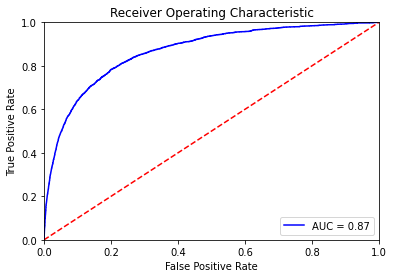

In [181]:
make_auc(model.best_estimator_,val_inputs,val_target)


### <a name="3.4"></a> 3.4 Section Summary

Let's wrap up what we got here in this section automating hyperparameter tuning. 

We have tried to tune the hyperparameter manually and programmatically. 


In the manual hyperparameter tuning, we tried to get ranges of critical parameters and build curves correspondingly. 

We learned how to use `GridSearchCV` in the automatic hyperparameter tuning, but it comes with a huge cost: 20+ hours. We also learned how to save our models into files and manage them ourselves.

All in all, the results are not very surprising and impressive.

So far, we have the best estimator with these parameters.
```
{'colsample_bytree': 0.9,
 'gamma': 1,
 'learning_rate': 0.01,
 'n_estimators': 1500,
 'subsample': 0.8}
```

We decided to use this set to submit to the competition on Kaggle.

## <a name="sbk"></a> IV. Submitting to Kaggle

##  [Back to Table of Contents ⏫](#table)
Before submitting the model and result to Kaggle, I saw many people are confused by these two terminologies at Kaggle.




### <a name="4.1"></a> 4.1 Public leaderboard

The public leaderboard uses a small dataset to test submitted models. It is not the actual score that represents your model performance, but it’s an estimate to let candidates see how well they are doing as instant feedback. They can make plans corresponding during competitions.


### <a name="4.2"></a>4.2 Private Leaderboard

Private leaderboard would be released after competitions end. Scores on the private leaderboard is the true score that your model had been used for the entire test dataset, unlike the subset of dataset on the public leaderboard.

We are using the dataset from Give Me Some Credit from one of post-competition on Kaggle. So we have to manually calculate the rank.

### <a name="4.3"></a> 4.3 Sumbit to Kaggle



#### 4.3.1 Check the Sample Entry

I also see some newcomers submitted the wrong file to Kaggle without any doubts. One student from Jovian Data Science Bootcamp gained a score of 0.207 and thought that was his model performance! But he was submitting the wrong CSV file!

In [182]:
sample_df = pd.read_csv('/content/GiveMeSomeCredit/sampleEntry.csv')
sample_df

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


#### 4.3.2 Use the Test Dataset

What we need to do here is to gain the probability of positives from our model and output a CSV format with columns `Id` and `Probability`.

We can make some predictions with the test dataset because we are ready to go with our best model.

We only need the input columns to get target column which is `SeriousDlqin2yrs`. 

In [183]:
 model.best_estimator_

XGBClassifier(colsample_bytree=0.9, gamma=1, learning_rate=0.01, missing=nan,
              n_estimators=1500, n_jobs=4, subsample=0.8)

In [184]:
test_input = df_test[input_cols]
best_preds = model.best_estimator_.predict_proba(test_input )

However, we don't need to submit a CSV file that contains all columns but `Id` and `Probability`. 

Be careful about the space in column names

In [185]:
output_df= pd.DataFrame(best_preds,columns=['negative','positive']).reset_index()
submitted_df = output_df.copy().rename(columns={'index':'Id','positive':'Probability'})
submitted_df.drop(columns=['negative'],inplace=True)
submitted_df['Id'] = np.arange(1,len(output_df)+1)

In [186]:
submitted_df

,Id,Probability
0,1,0.074914
1,2,0.051624
2,3,0.012945
3,4,0.082616
4,5,0.091831
...,...,...
101498,101499,0.042517
101499,101500,0.315586
101500,101501,0.004596
101501,101502,0.068536


#### 4.3.3 The Result on Kaggle

Output data into the required CSV file

In [187]:
submitted_df.to_csv('211228_david_zhong.csv',index=False)

![](https://pbs.twimg.com/media/FHtleQ8XwAI4tNc?format=jpg&name=large)

Having checked the private leaderboard, my position is top 21% on the Kaggle leaderboard.

## <a name="con"></a>V. Conclusion

####  [Back to Table of Contents ⏫](#table)


### <a name="5.1"></a>5.1 The Purpose

We've reached the end of the project. My aim is to go through some fundamental machine learning concepts and walk through traditional machine learning algorithms. In future, whenever I need to refresh my knowledge in machine learning, I can always visit this notebook. I called the completed project a "Knowledge Asset" that pays dividends in the long term.



### <a name="5.2"></a>5.2 The Aim

This project solves a classification problem with credit card default payment using the 'Give Me Some Credit' at Kaggle.com. With the existing dataset, we learned how to split the dataset into training and validation and submit predictions with the best model using the given test dataset. 




### <a name="5.3"></a>5.3 The Process

Unlike others, I purposely did not choose the waterfall method. i.e. Training all models. Evaluating all models, tuning all models at once. Because my preference is to explain each model in great details so others can learn them through the notebook

![](https://pbs.twimg.com/media/FGKtYUvXsAAdmYd?format=jpg&name=medium)



### <a name="5.4"></a>5.4 The Models

We have gone through 4 traditional machine learning models: the logistic model, the decision tree model, the random forest model, and the XGBoost model. 





#### 5.4.1 Logistic

Unlike linear regression, logistic regression solves a classification problem using the sigmoid function to convert a range of features and to map predicted values to probabilities between 0 and 1.



#### 5.4.2 Decision Tree

A decision tree asks input data a sequence of If-Else conditions, divides data based on the best-split features into subsets, and eventually makes predictions. 



#### 5.4.3 Random Forest

Random forest combines decision trees with randomness, which is the product of machine learning, statistics and programming. Random forest bootstraps the dataset, samples features, and aggregates all predictions into a final result.



#### 5.4.4 XGBoost

XGBoost is the combination of decision tree model and the gradient boosting framework. Essentially,   new models will predict the errors of existing models following the step of adding the errors together to infer the final prediction for each boosting round. 



#### 5.4.5 Evaluation Metrics

More importantly, we learned how to evalue the classification models performance with confusion matrix, Receiver Operating Characteristic (ROC), Area under the Receiver Operating Characteristic (AUC-ROC) since we are solving a classification problem.

#### 5.4.6 Hyperparameter Tuning

We picked the best model: XGBoost, and tuned hyperparameters in two ways.  

We manually tuned hyperparameters to discover the best value for hyperparameter by analysing curves;  

We applied the GridSearchCV method to find the best combinations of sets of hyperparameters with a high cost of 20 hours of computing time.

### <a name="5.5"></a>5.5 The Results

>When in doubt, use xgboost. - Avito Winner’s Interview: 1st place, Owen Zhang

The winning model is XGBoost which helps the project achieve the top 21% on the private leaderboard at Kaggle.com. 

### <a name="5.6"></a>5.6 The limitations

There is no perfect machine learning model, but some are good enough to solve the problem. Since the project is from the perspective of learning machine learning, our data is a constant variable, so the room for improvement in the model performance is tiny and less meaningful. Hence, the project does not choose to tune each model.

Additionally, the entire project is conducted by a single-man team. Without further communication and feedback from users of algorithms, the project assumes the best scenario. It should not be surprising to see the model's poor performance in real life, as there could be millions of factors for data science projects in the commercial world.

### <a name="5.7"></a>5.7 Next Steps

#### 5.6.1 New Projects

My next step would potentially focus on the regression problem, unsupervised learning such as clustering problem, customer segmentation problem, or building recommendation system. 

#### 5.6.2 New challenges

I'm doing #66daysofdata on twitter [@shenghongzhong](https://twitter.com/ShenghongZhong). Also,my next challenge is to conduct data analysis each week as daily exercises. 


#### 5.6.3 New opportunities

On the other hand, I've started my job hunting during the project. Unfortunately, the job hunt hasn't been smooth. Nevertheless, I'm looking forward to opportunities in the data science field. 

## <a name="ackn"></a>VI. Acknowledgements


I want to thank my family in China, housemates and friends who support me financially and emotionally in any possible way.

The success of this project is only possible because of the mentoring of Aakash N S, Siddhant Ujjain, teaching assistant Biraj De, and the entire Jovian team. I had countless calls with Aakash and messages with Siddiant back and forward. I asked tons of questions in Slack.

Although the project is for the certificate of the 2021 Jovian Data Science Bootcamp, I never treat it as a task but a great learning opportunity, even though I wanted to give up many times. What I learned here is solving machine learning problems, which enables me to craft data science projects with confidence.

I want to thank my coursemates at Jovian and my data science peers on Twitter. They have witnessed my journey, seen me battle in tough times, and encouraged me along the journey.

There are many people I haven't mentioned but I could not finish this project without all of your help.

In the end, I want to thank me.  I didn't run away from tough problems. Instead, I chose to lower my head and get my hands dirty with codes. I did it eventually. It reminds me of my post on the first day of the full-time job two years ago






In [188]:
from IPython.core.display import display, HTML
display(HTML('<iframe style="center" src="https://www.linkedin.com/embed/feed/update/urn:li:share:6619902566358745088" height="995" width="504" frameborder="0" allowfullscreen="" title="Embedded post"></iframe>'))

# <a name="ref"></a>Reference

[1] Kaggle., 2011. Give Me Some Credit https://www.kaggle.com/c/GiveMeSomeCredit/

[2] Myrianthous, G., 2021 . How to Split a Dataset Into Training and Testing Sets with Python. https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830

[3] Myrianthous, G., 2020 . Feature Scaling and Normalisation in a Nutshell. https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b

[4] Thomas, R., 2017. How (and why) to create a good validation set.  https://www.fast.ai/2017/11/13/validation-sets/

[5] Aakash N S. Gradient Boosting Machines (GBMs) with XGBoost,2021. https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost

[5] Brownlee, J., 2016. How to Develop Your First XGBoost Model in Python https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

[6] Tina,2019. Intro to Credit Scorecard.  https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f

[7] Blonkowski, E., 2020. Exploring Machine Learning Solutions for Credit Scoring Farmers in Kenya. https://towardsdatascience.com/exploring-machine-learning-solutions-for-credit-scoring-farmers-in-kenya-8fb653db4b08

[8] Siddiqi, N., 2012. Credit risk scorecards: developing and implementing intelligent credit scoring (Vol. 3). John Wiley & Sons 

[9] Nguyen, A., 2020. Credit Risk Management: EDA & Feature Engineering. https://towardsdatascience.com/credit-risk-management-eda-feature-engineering-81cc34efc428

[10] Jilegezai., 2021. https://zhuanlan.zhihu.com/p/148102950

[11] Jilegezai., 2021. AI智能风控(二）——风控评分卡全流程建模看这篇就够了. https://www.kaggle.com/orange90/credit-scorecard-example

[12] Qiushiwangzailushang ., 信贷风控中Vintage、滚动率、迁移率的理解. https://zhuanlan.zhihu.com/p/81027037

[13] Lundberg, S., 2018. Interpretable Machine Learning with XGBoost. https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

[14] Berenbaum, D., 2020. Is it easy to explain? Global explainability in Boosted Trees. https://towardsdatascience.com/is-it-easy-to-explain-part-i-global-explainability-in-boosted-trees-cac51ae63a4c

[15] Lee, A., 2021. scorecard code. https://www.kaggle.com/ademain/scorecard-code

[16] Fishman, S., 2018. Comp Stats Group Data Project - Final. https://www.kaggle.com/simonpfish/comp-stats-group-data-project-final

[17] Upadhyay, R., 2014. Information Value (IV) and Weight of Evidence (WOE) – A Case Study from Banking (Part 4). http://ucanalytics.com/blogs/information-value-and-weight-of-evidencebanking-case/

[18] 
Harikrishnan N B., Confusion Matrix, Accuracy, Precision, Recall, F1 Score. https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd

[19] Ceballos, F. 2019. Scikit-Learn Decision Trees Explained. https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

[20] BogoToBogo. 2020. SCIKIT-LEARN : DECISION TREE LEARNING I - ENTROPY, GINI, AND INFORMATION GAIN. https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

[21] Tyagi, N., 2021.What is Information Gain and Gini Index in Decision Trees?. https://www.analyticssteps.com/blogs/what-gini-index-and-information-gain-decision-trees

[22] Breiman, L., Friedman, J. H., Olshen, R. A., & Stone, C. J. (2017). Classification and regression trees. Routledge.

[23] Seif, G., 2018. Applying decision trees to machine learning models. https://www.reforge.com/brief/apply-decision-trees-to-machine-learning-models#DBKm8tQsj_4qz0gPYdnvRw

[24] Self, G. 2018. A Guide to Decision Trees for Machine Learning and Data Science. https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956

[25] Self, G. 2018. Handling Imbalanced Datasets in Deep Learning. https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758

[26] StatQuest with Josh Starmer. 2019. ROC and AUC, Clearly Explained!. https://www.youtube.com/watch?v=4jRBRDbJemM

[27] Grigorev, A. 2019. Machine Learning Bookcamp. https://github.com/alexeygrigorev/mlbookcamp-code

[28] Myrianthous, G. 2021. fit() vs predict() vs fit_predict() in Python scikit-learn. https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f

[29] Malik, F. 2020. What Is Grid Search?. https://medium.com/fintechexplained/what-is-grid-search-c01fe886ef0a

[30] Hyperparameter Tuning with GridSearchCV. https://www.mygreatlearning.com/blog/gridsearchcv/

[31] Great Learning Team. 2020. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[32] Scikit-learn Documentation. 2017. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

[33] Géron, A., 2019. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media.

[34] Browniee, J. 2021. A Gentle Introduction to XGBoost for Applied Machine Learning. https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

[35] Brownlee, J. 2020. How to Use StandardScaler and MinMaxScaler Transforms in Python. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

[36] Powell, S. 2011. How to link to a named anchor in Multimarkdown?  StackOverFlow. https://stackoverflow.com/questions/6695439/how-to-link-to-a-named-anchor-in-multimarkdown
